In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('Pharma.csv')


# Summary

In [4]:
print(data.head())
print(data.info())
print(data.describe())


  LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND
0      AUS  1971       15.992   0.727   35.720        NaN       462.11
1      AUS  1972       15.091   0.686   36.056        NaN       475.11
2      AUS  1973       15.117   0.681   39.871        NaN       533.47
3      AUS  1974       14.771   0.755   47.559        NaN       652.65
4      AUS  1975       11.849   0.682   47.561        NaN       660.76
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB
None
              TIME  PC

In [5]:
data = data.drop_duplicates()
data = data.fillna(method='ffill')  # or any other method appropriate for your data


C:\Users\USER\AppData\Local\Temp\ipykernel_10588\948300519.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # or any other method appropriate for your data


# Some Basic Histograms and box plots

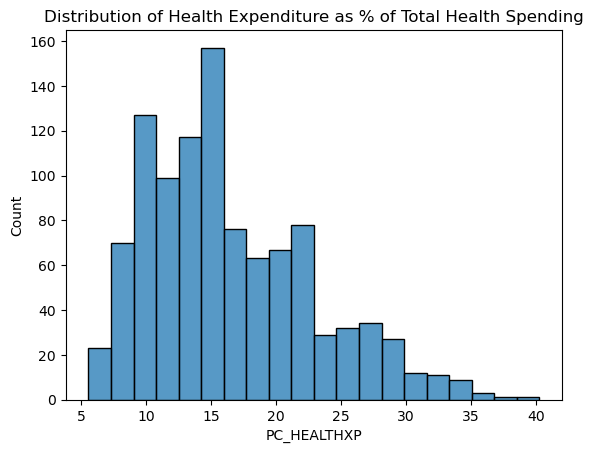

In [6]:

sns.histplot(data['PC_HEALTHXP'], bins=20)
plt.title('Distribution of Health Expenditure as % of Total Health Spending')
plt.show()

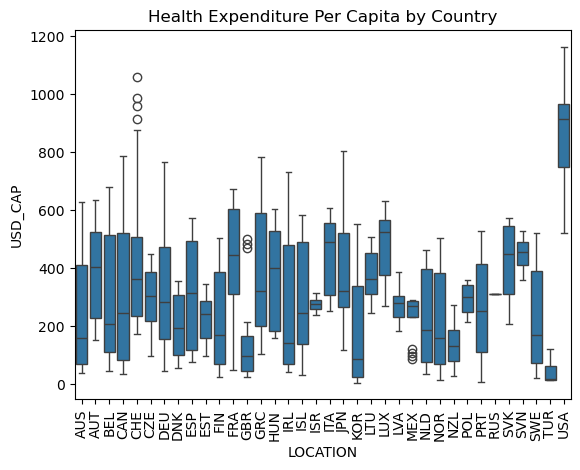

In [7]:
#Box plots across countries 
sns.boxplot(data=data, x='LOCATION', y='USD_CAP')
plt.xticks(rotation=90)
plt.title('Health Expenditure Per Capita by Country')
plt.show()


## Trends 
Line plots for each country to visualize trends over time.

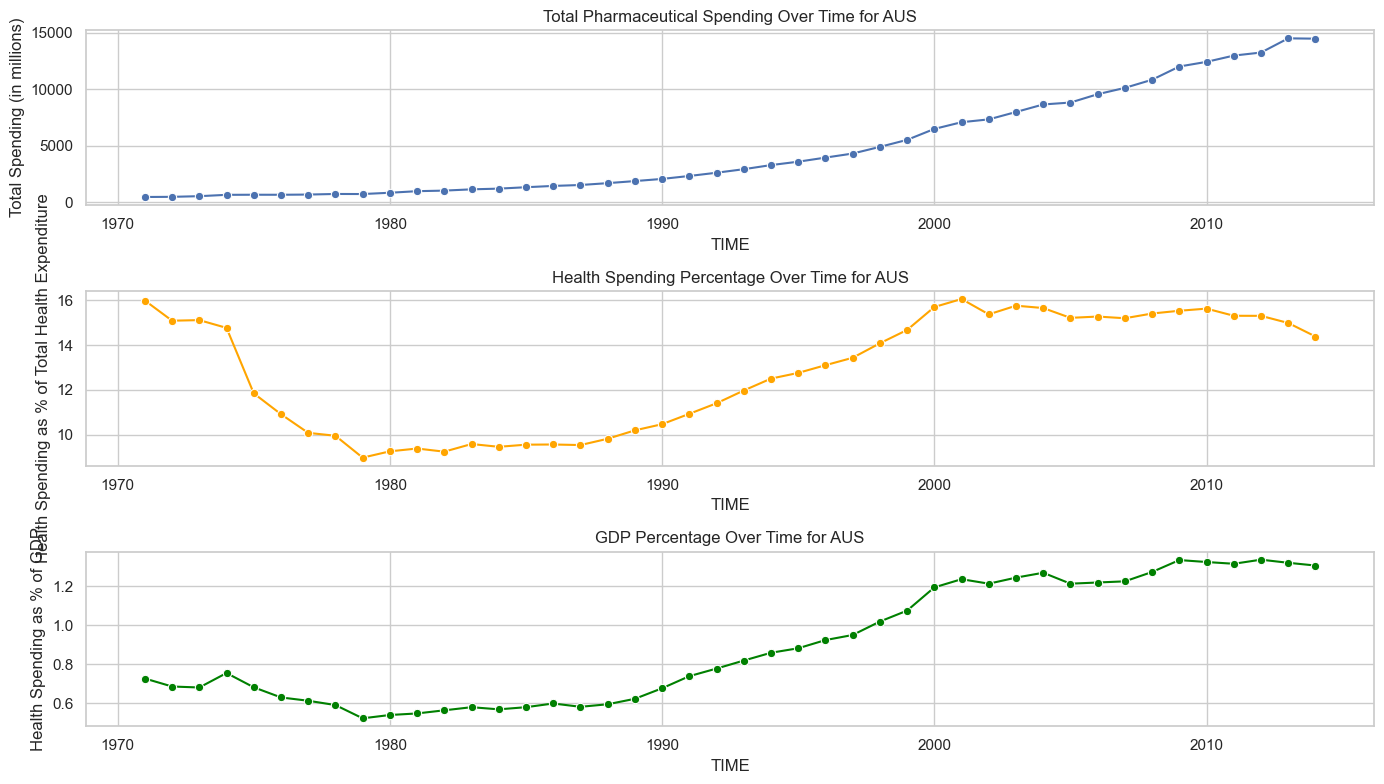

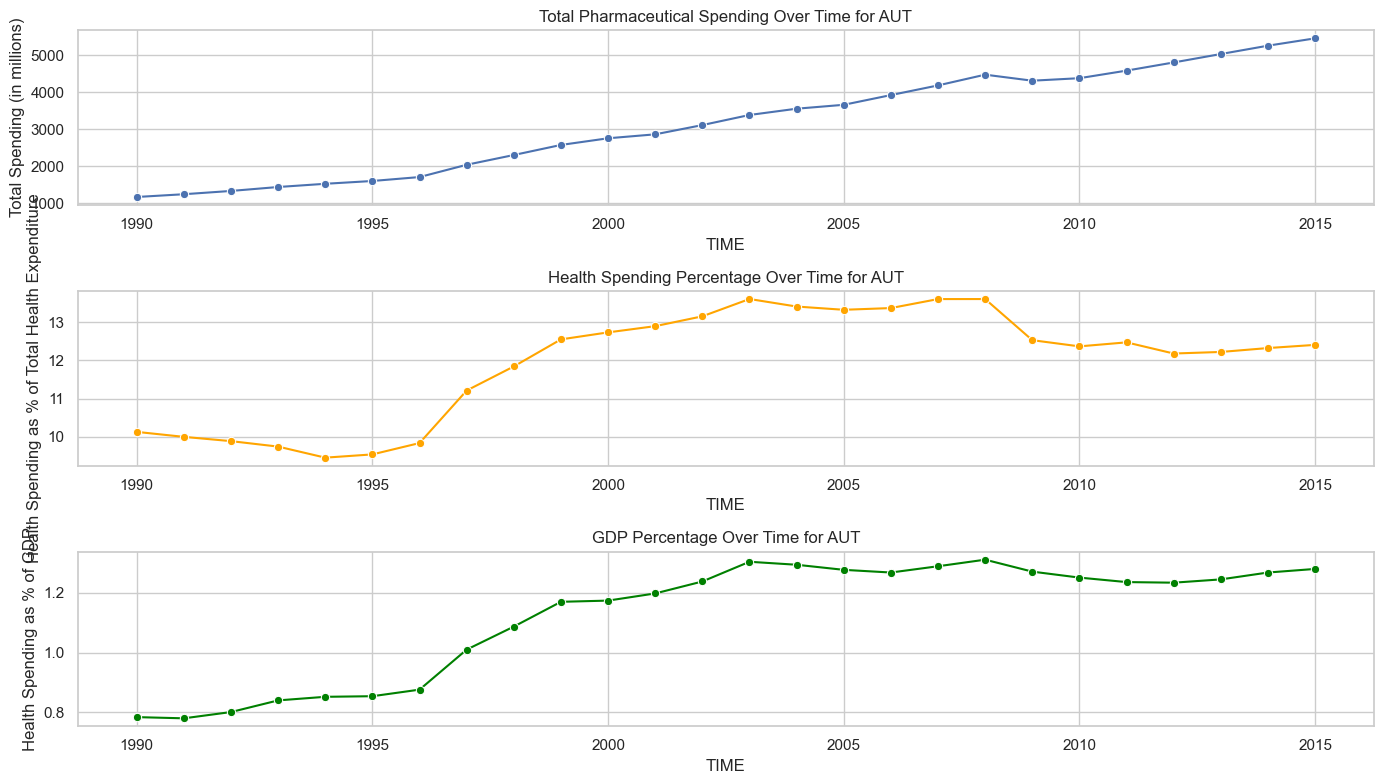

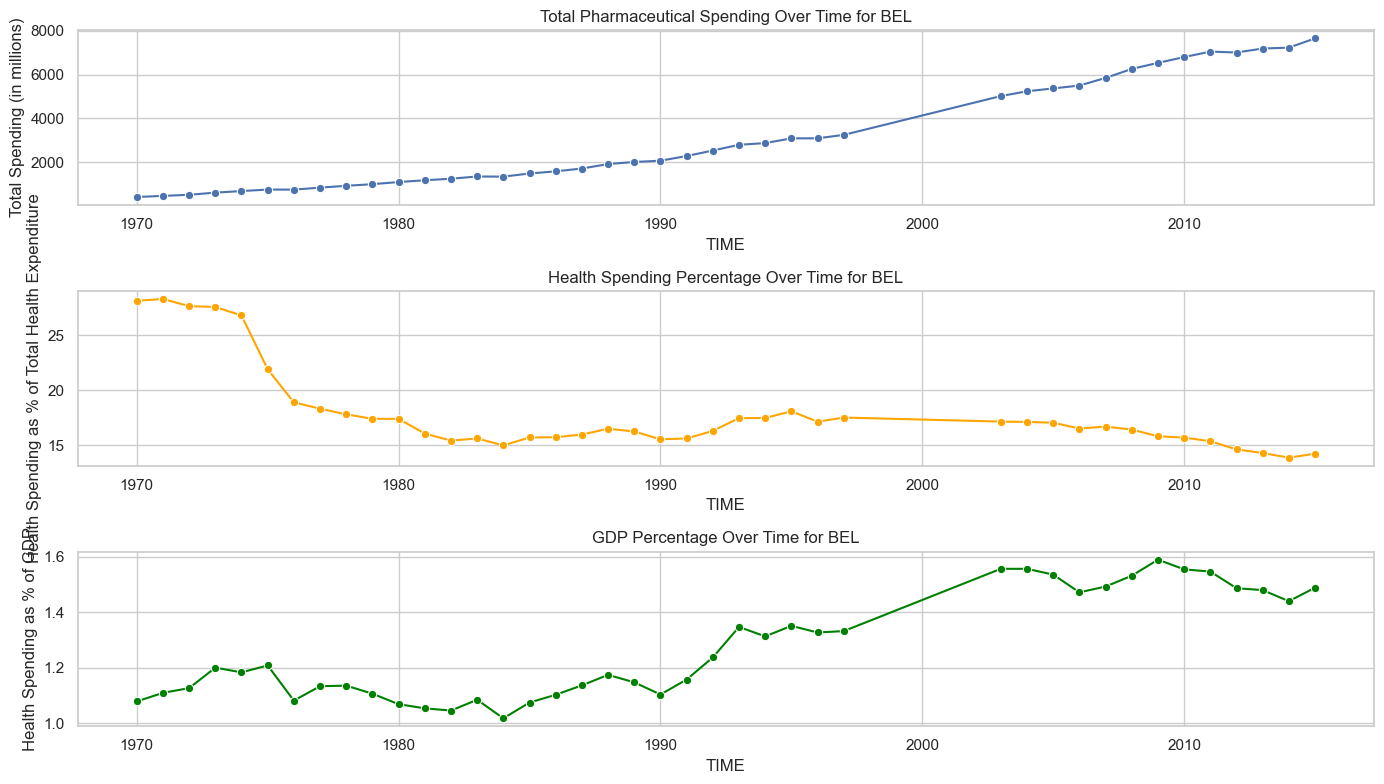

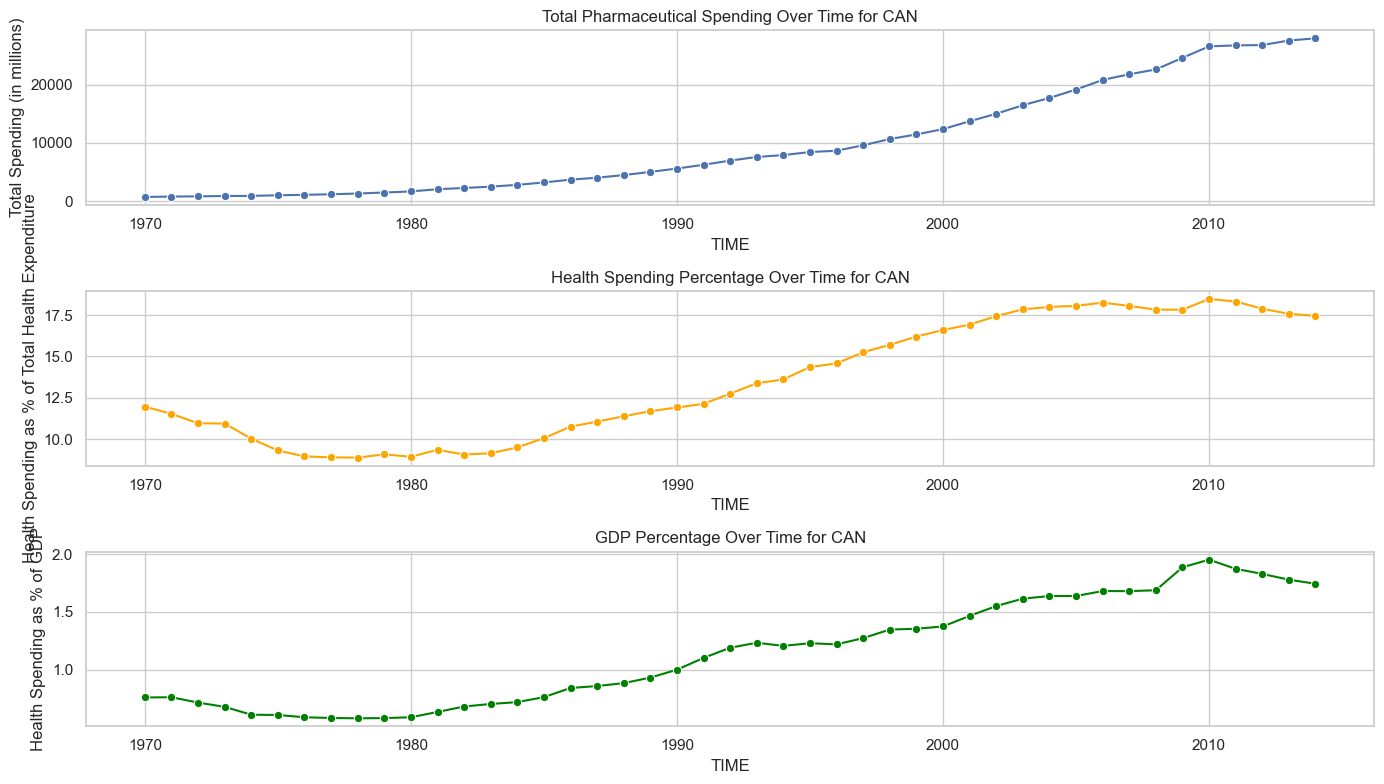

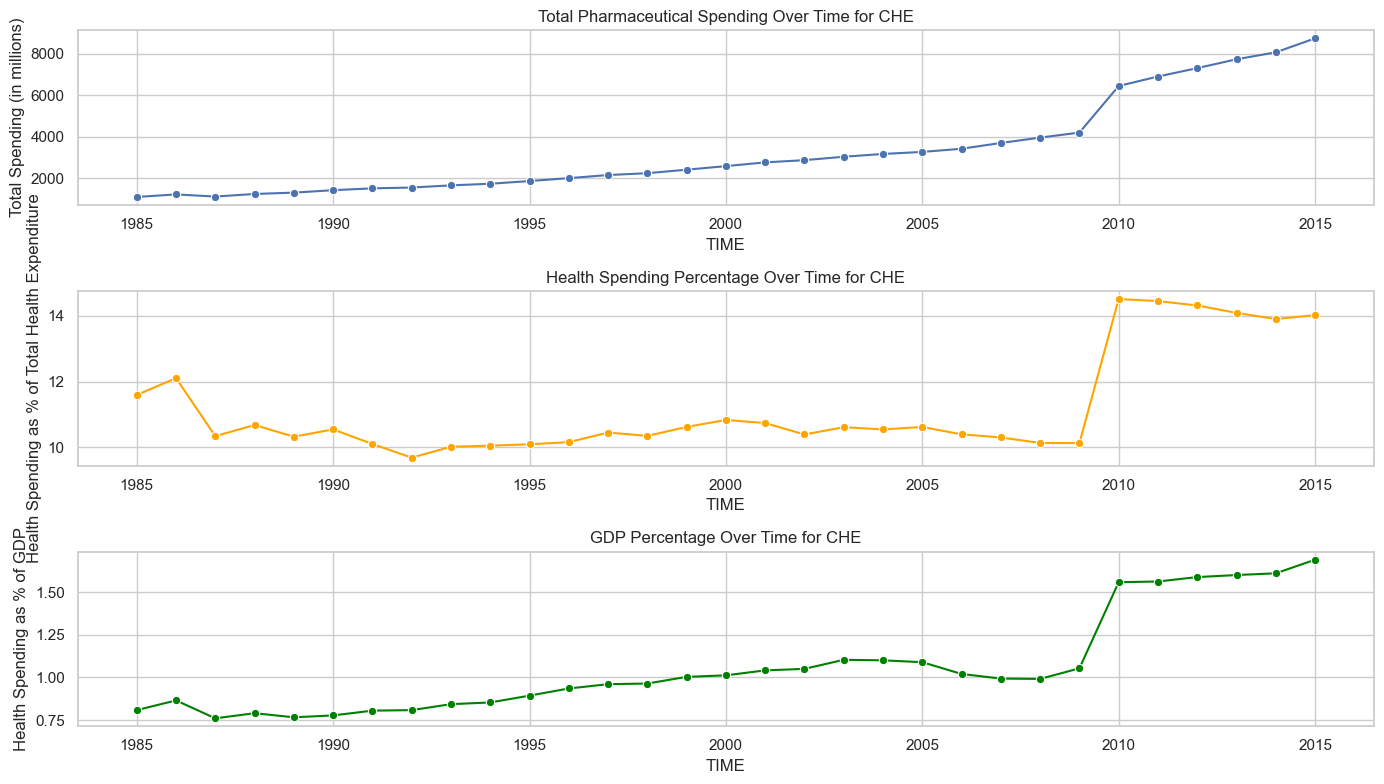

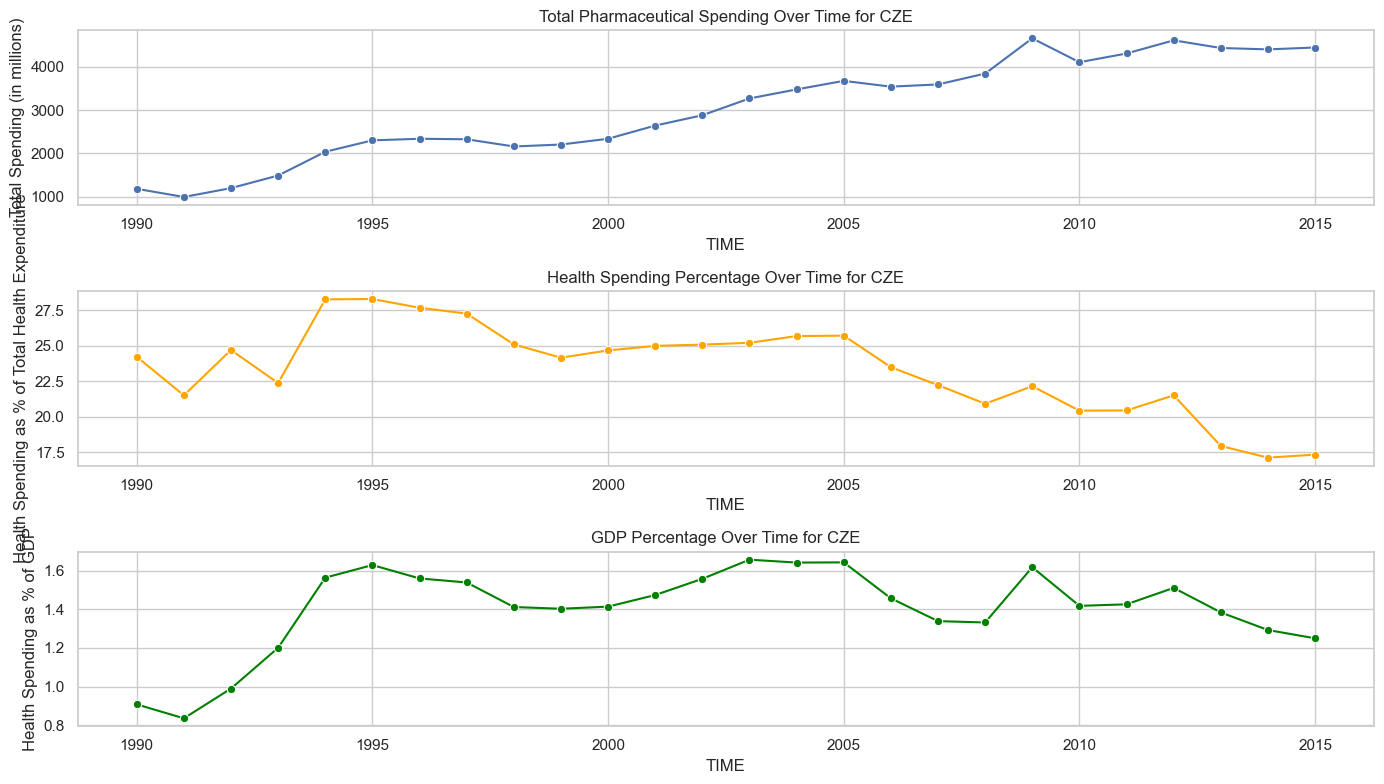

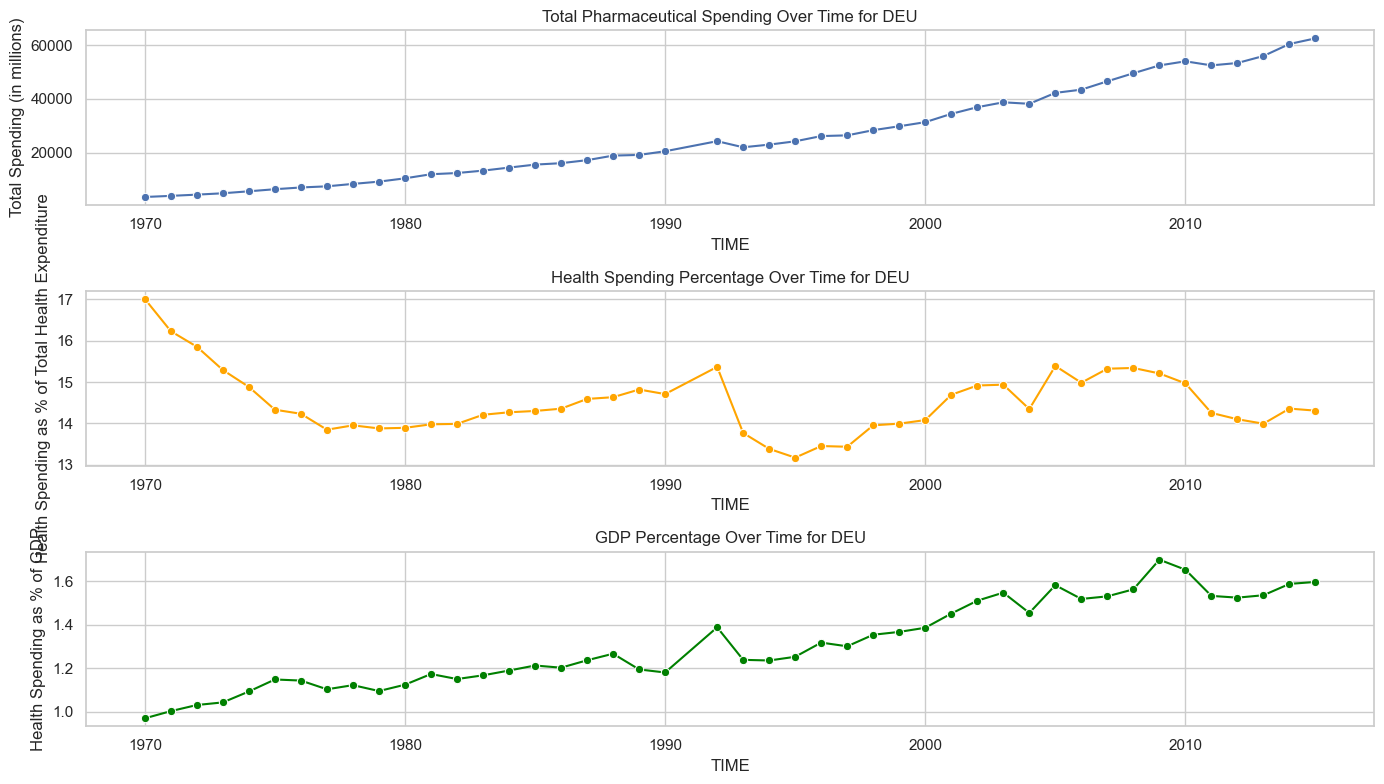

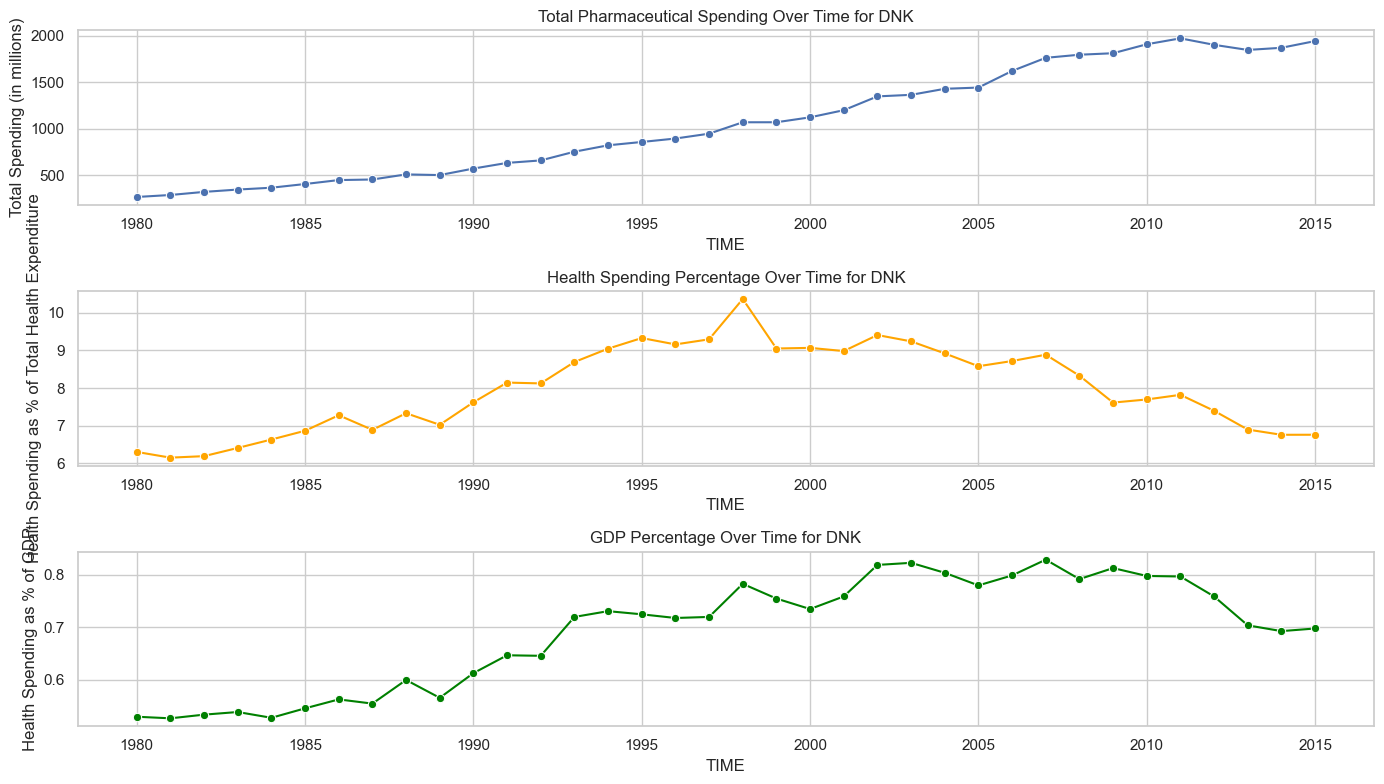

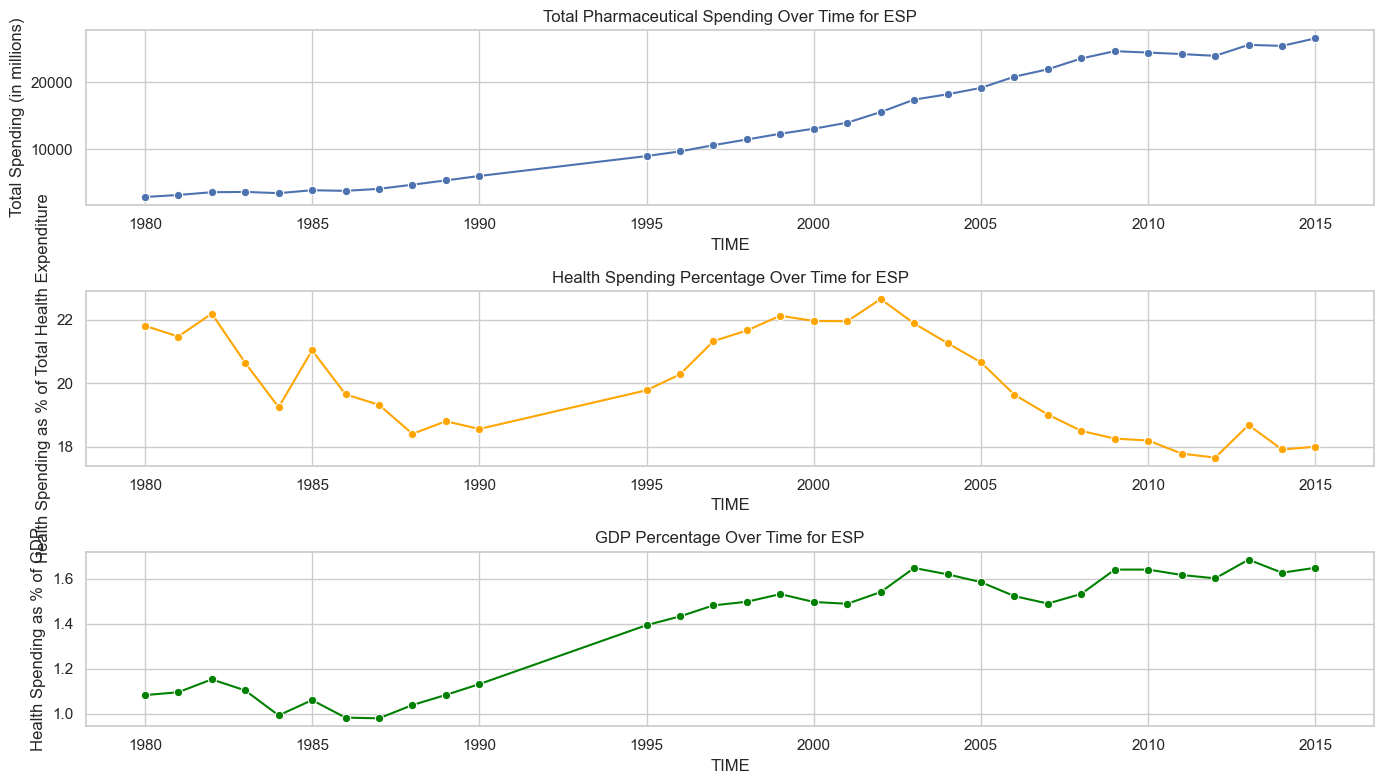

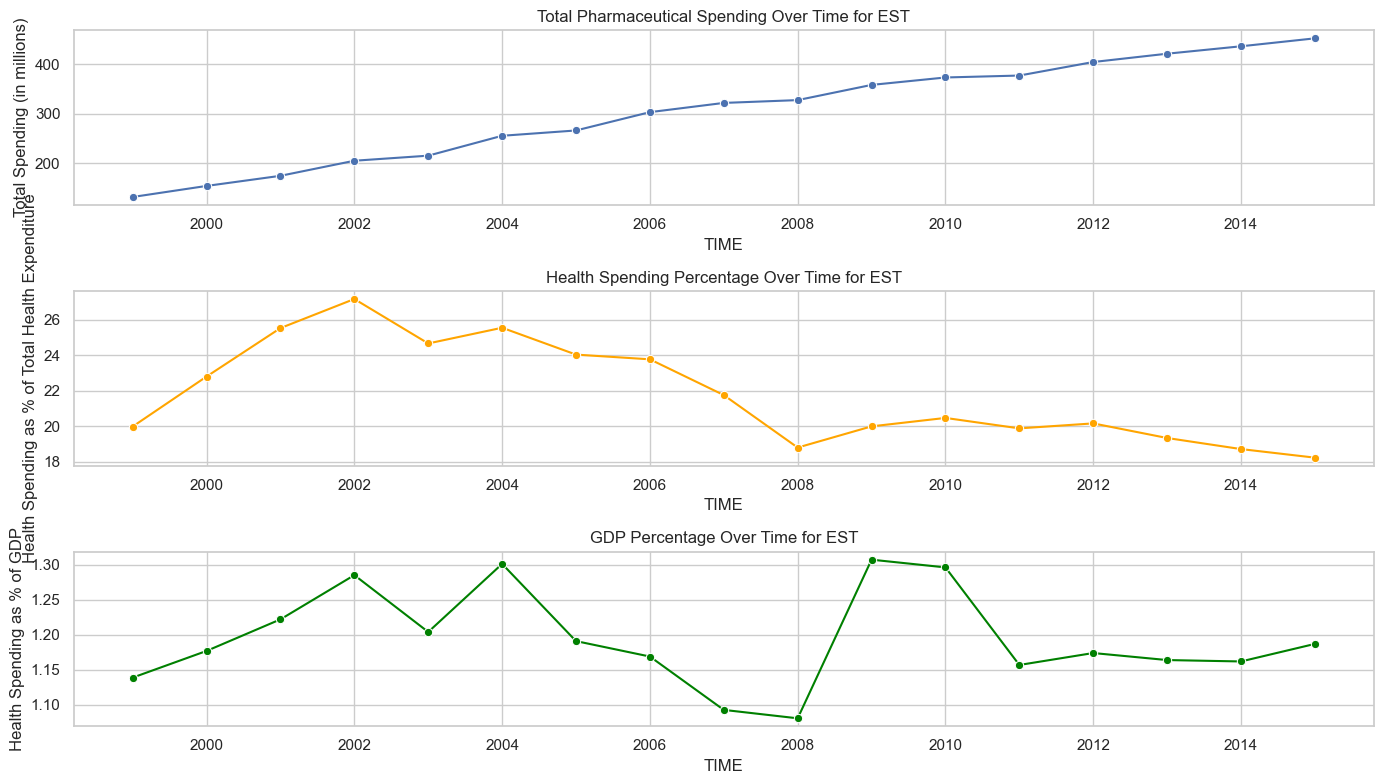

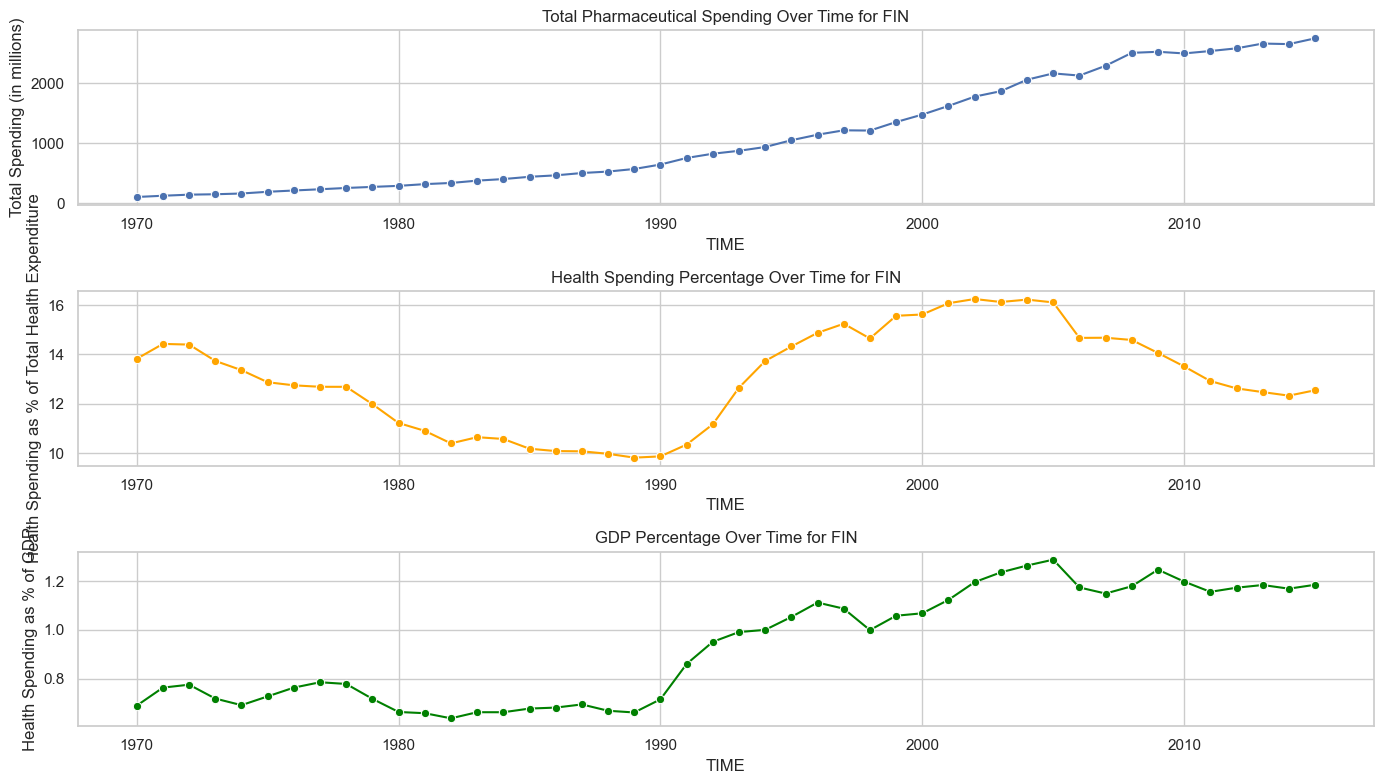

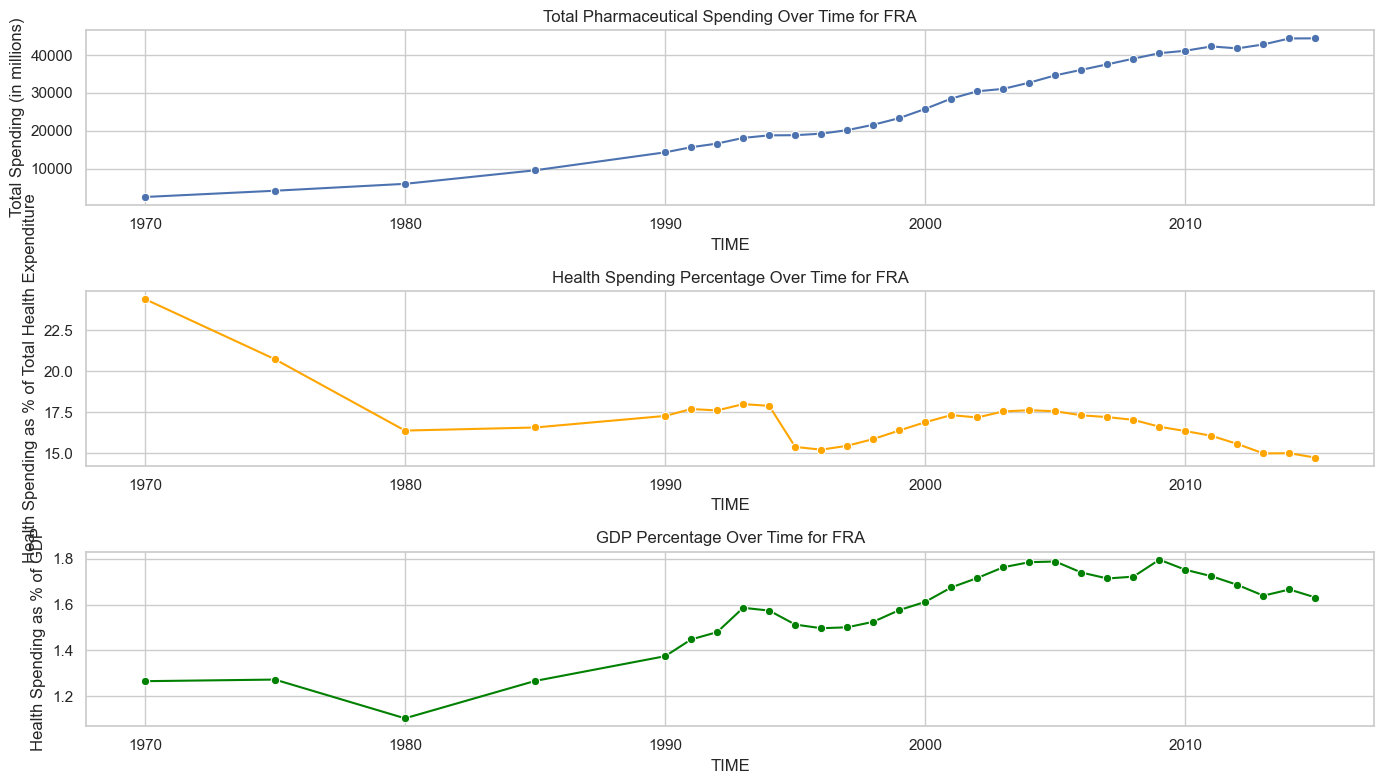

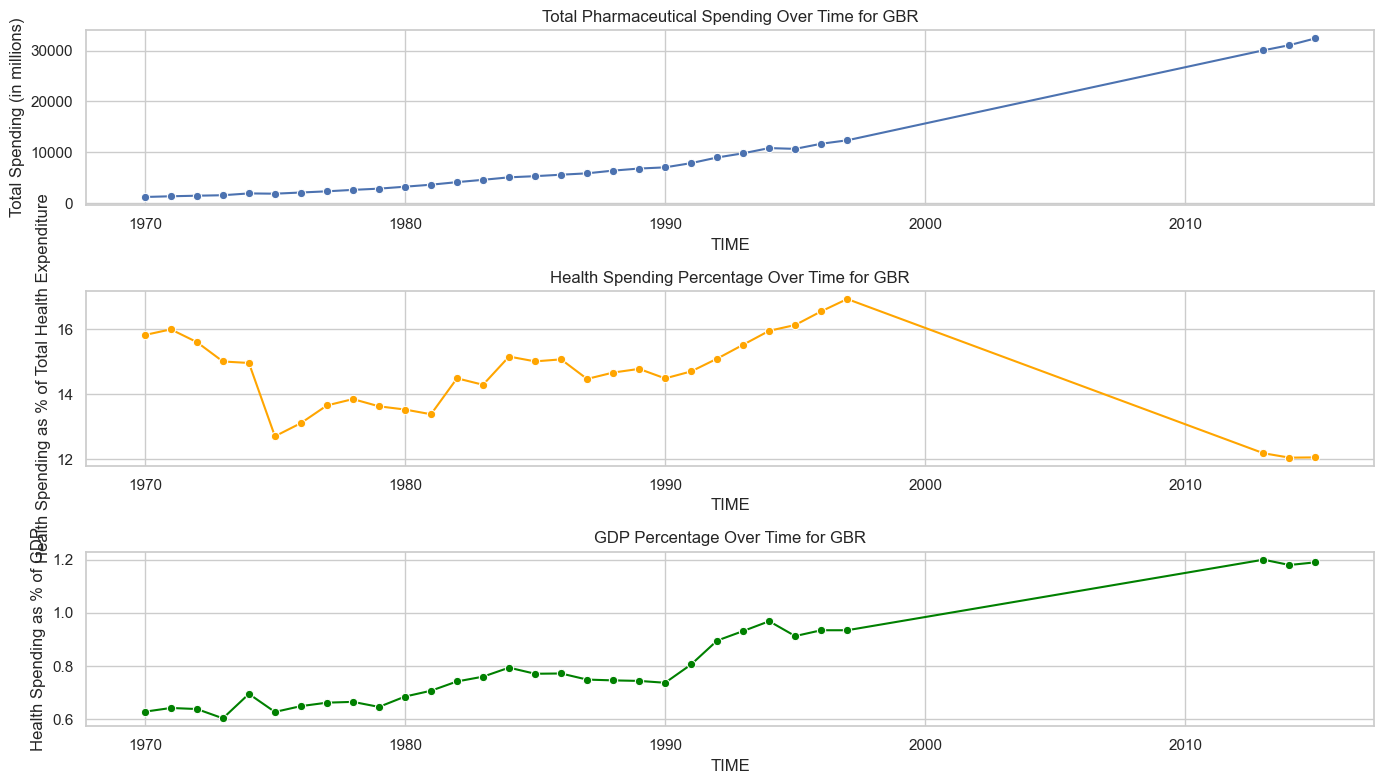

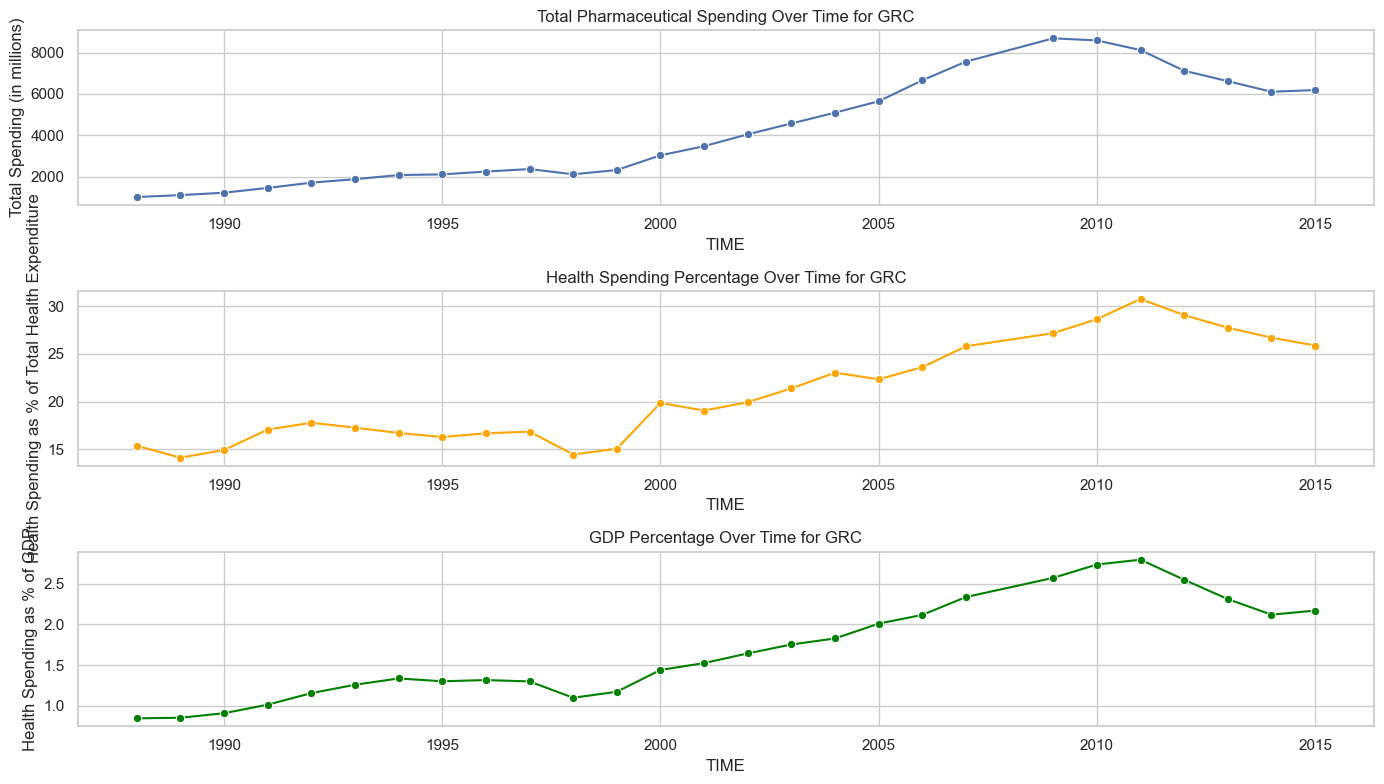

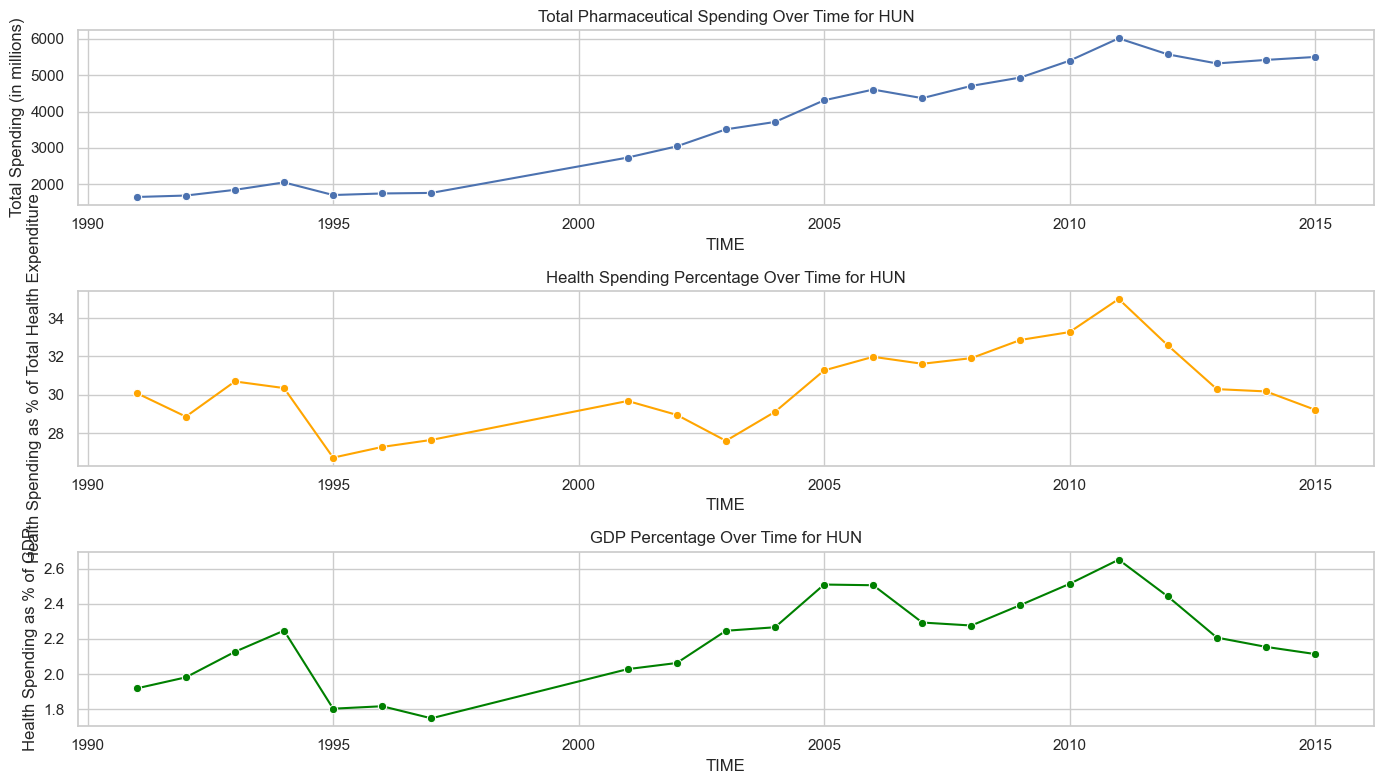

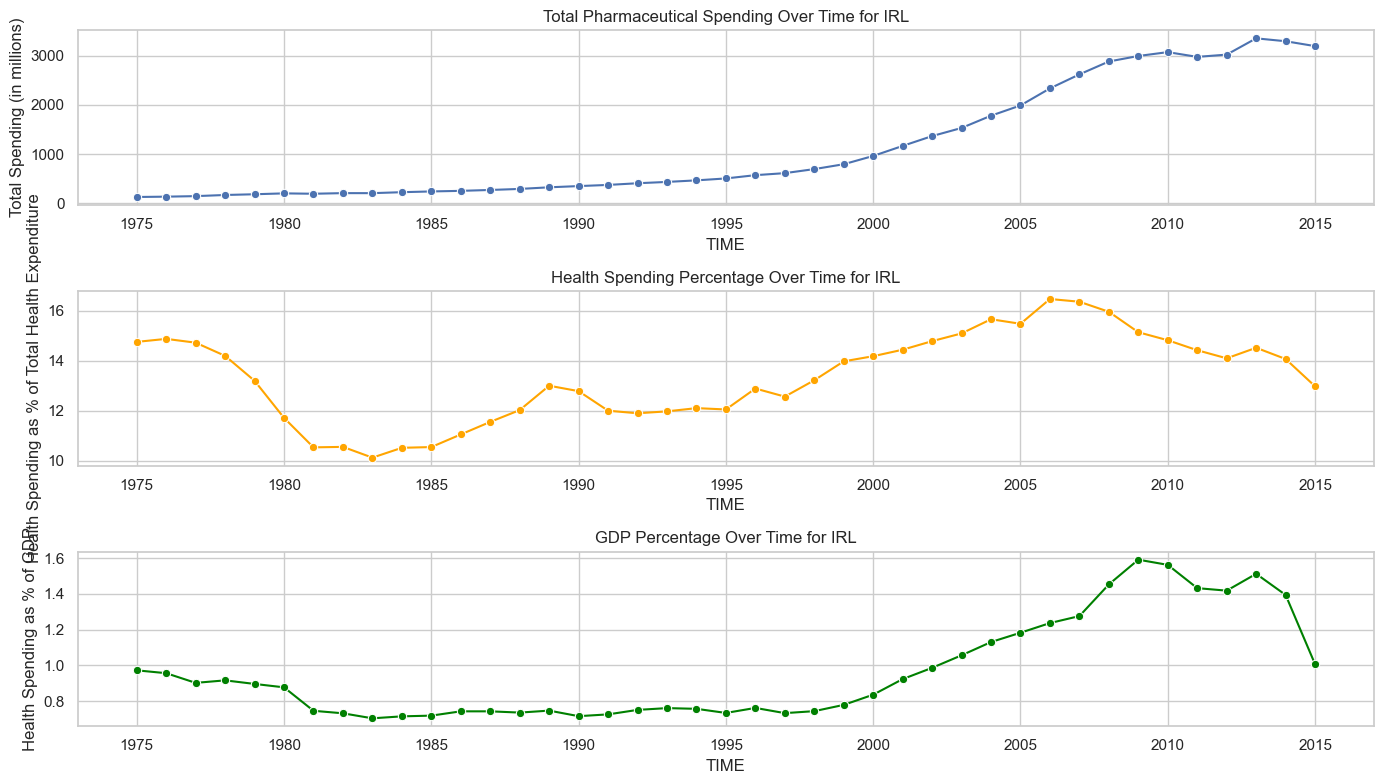

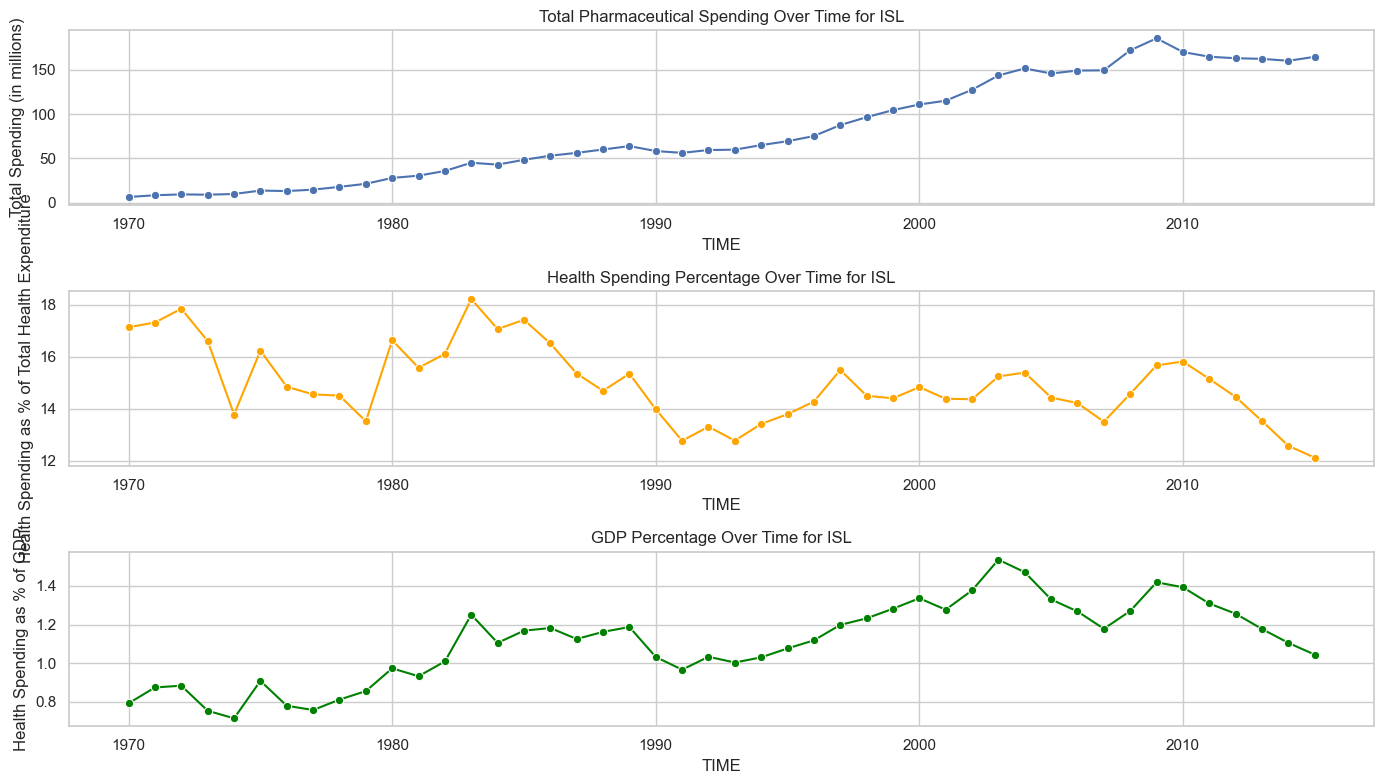

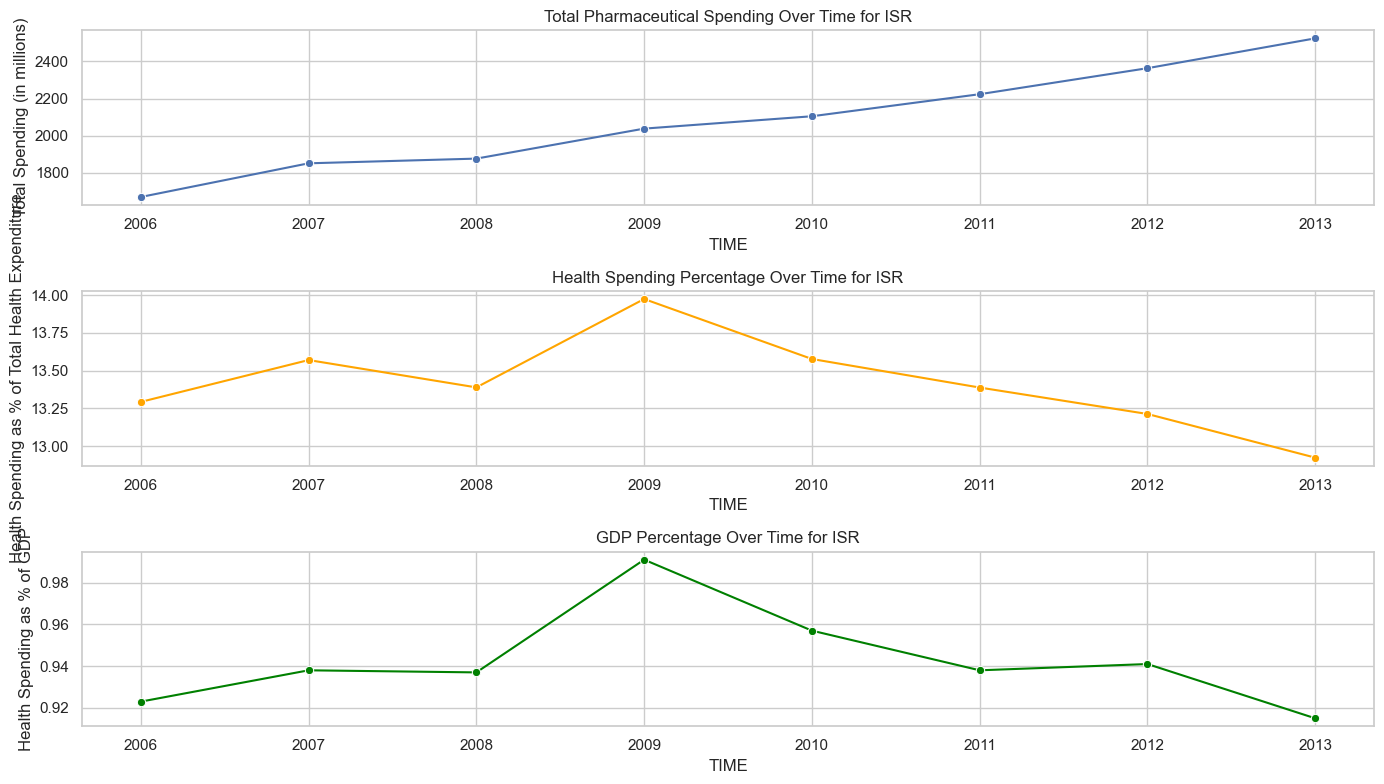

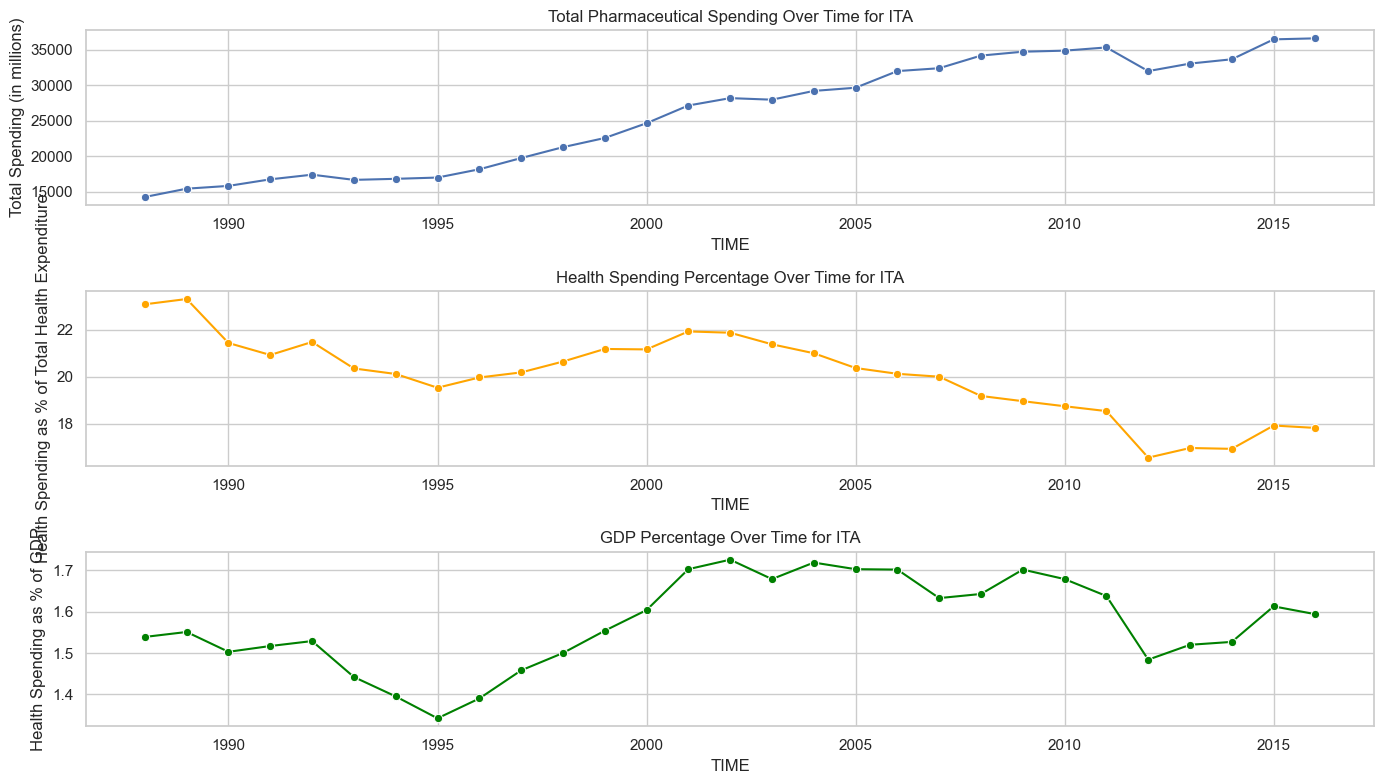

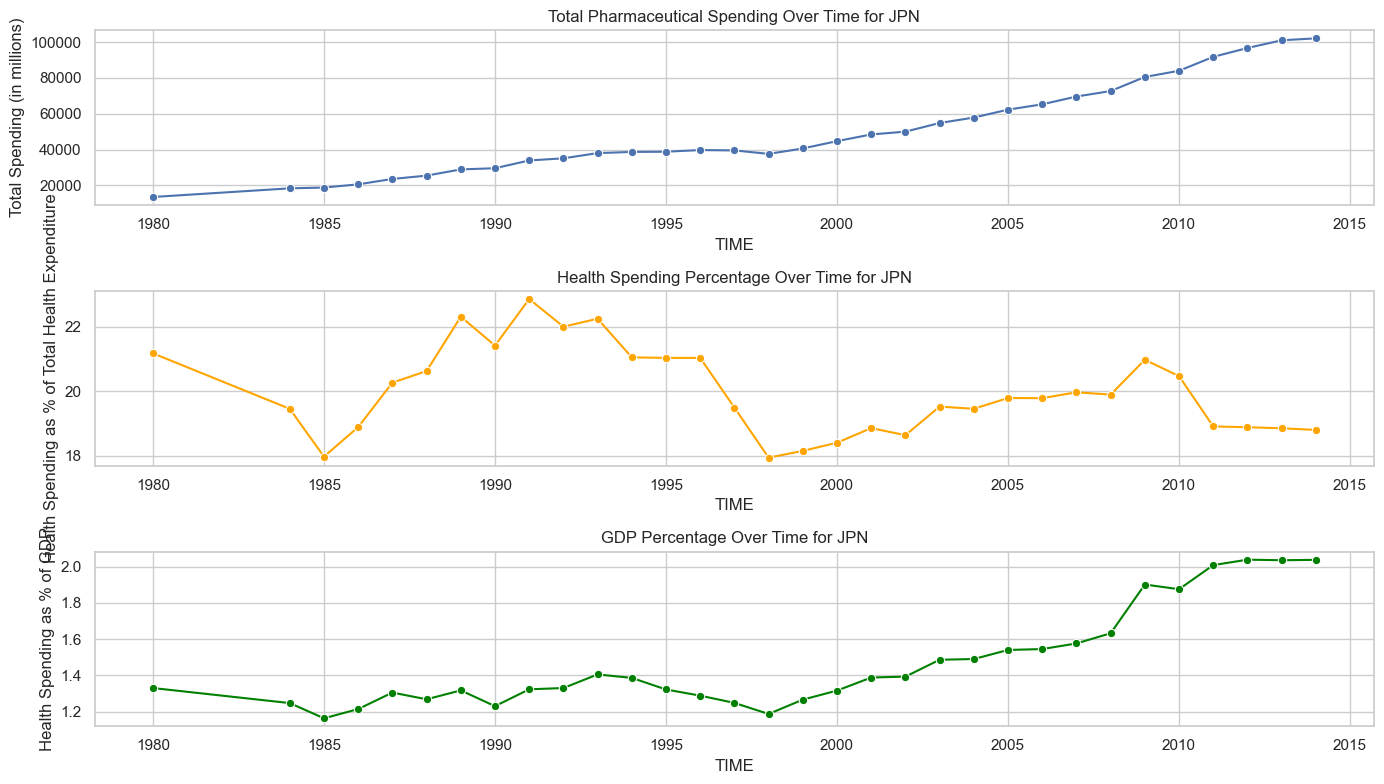

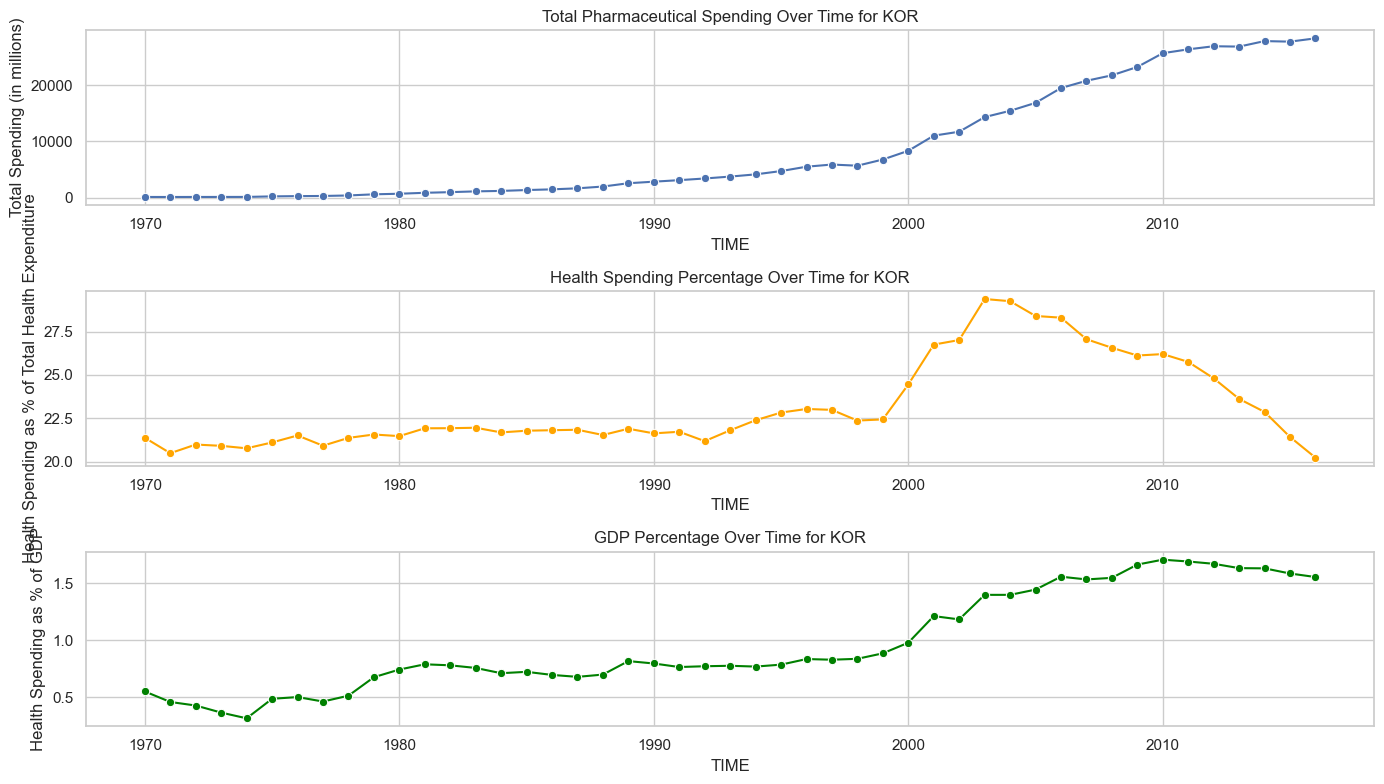

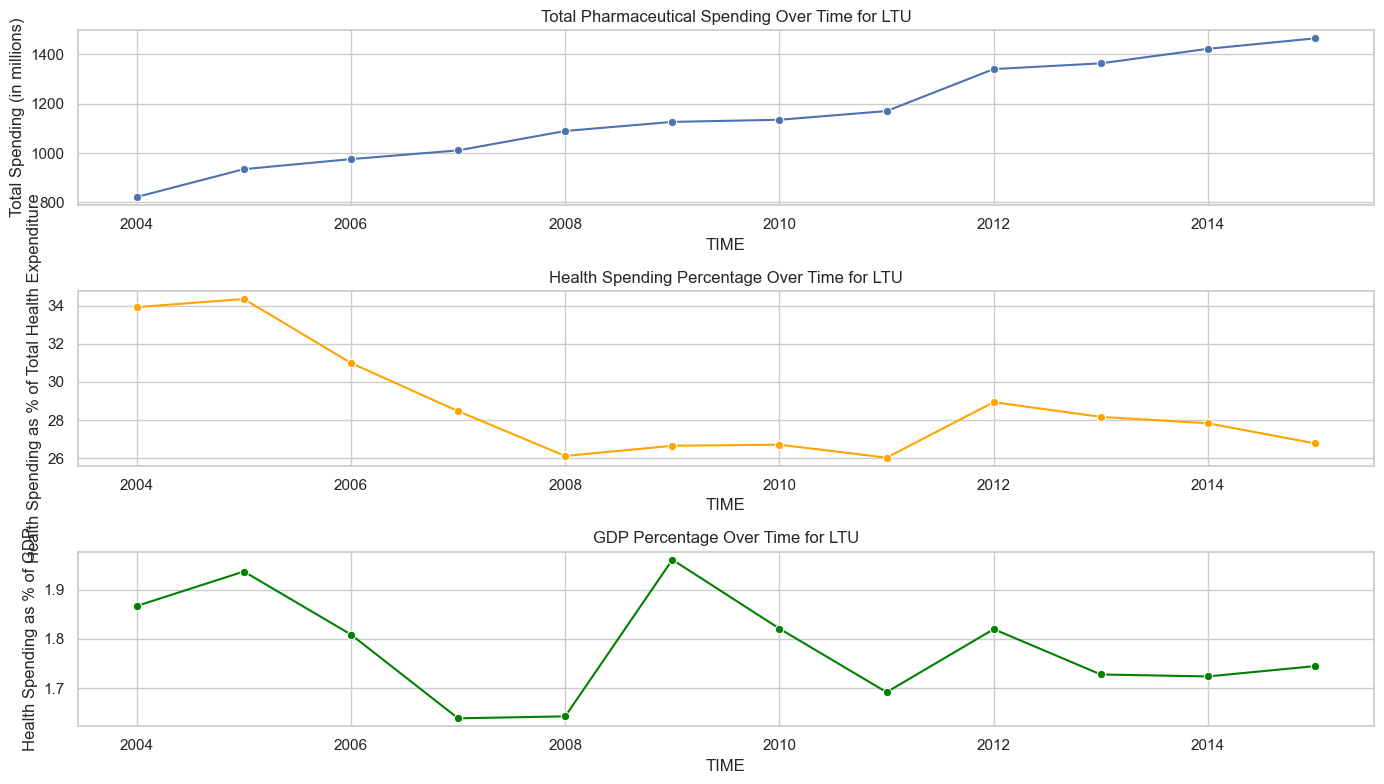

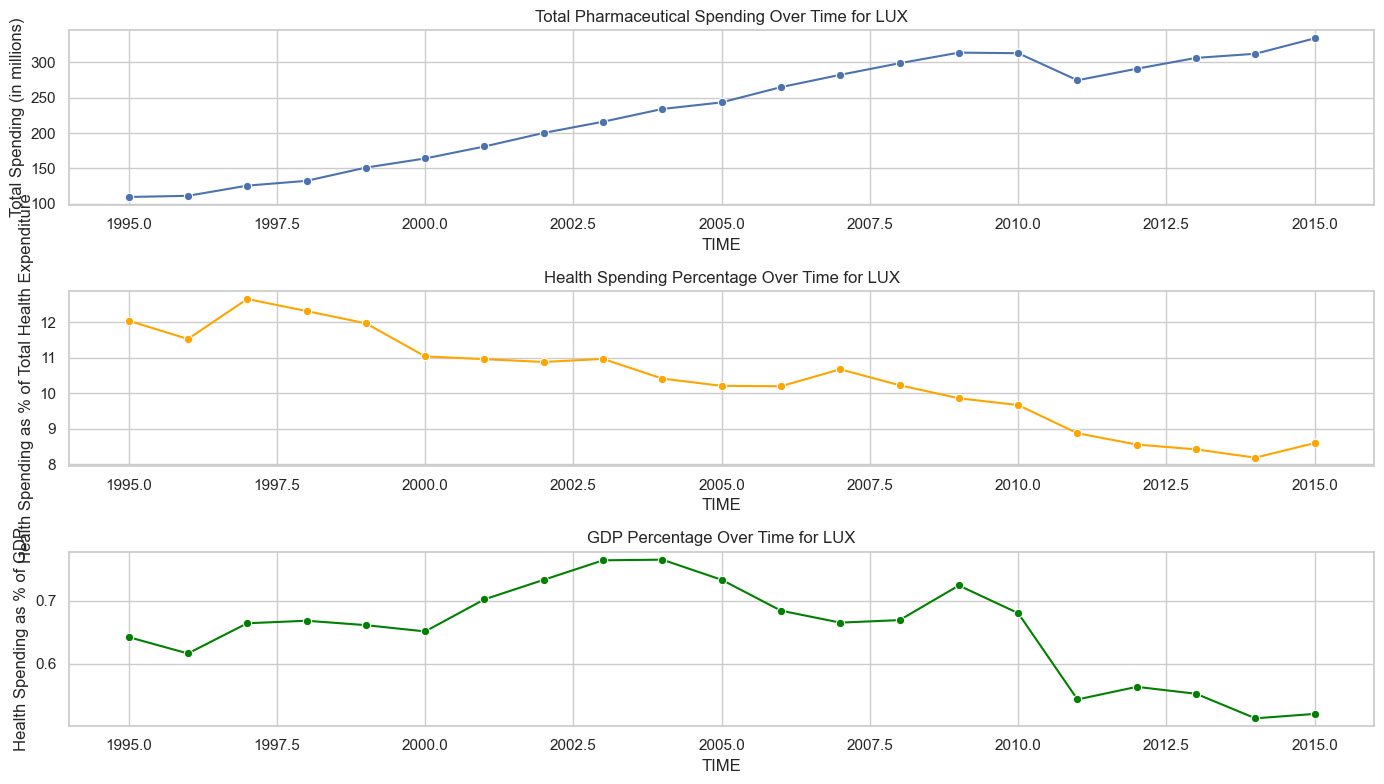

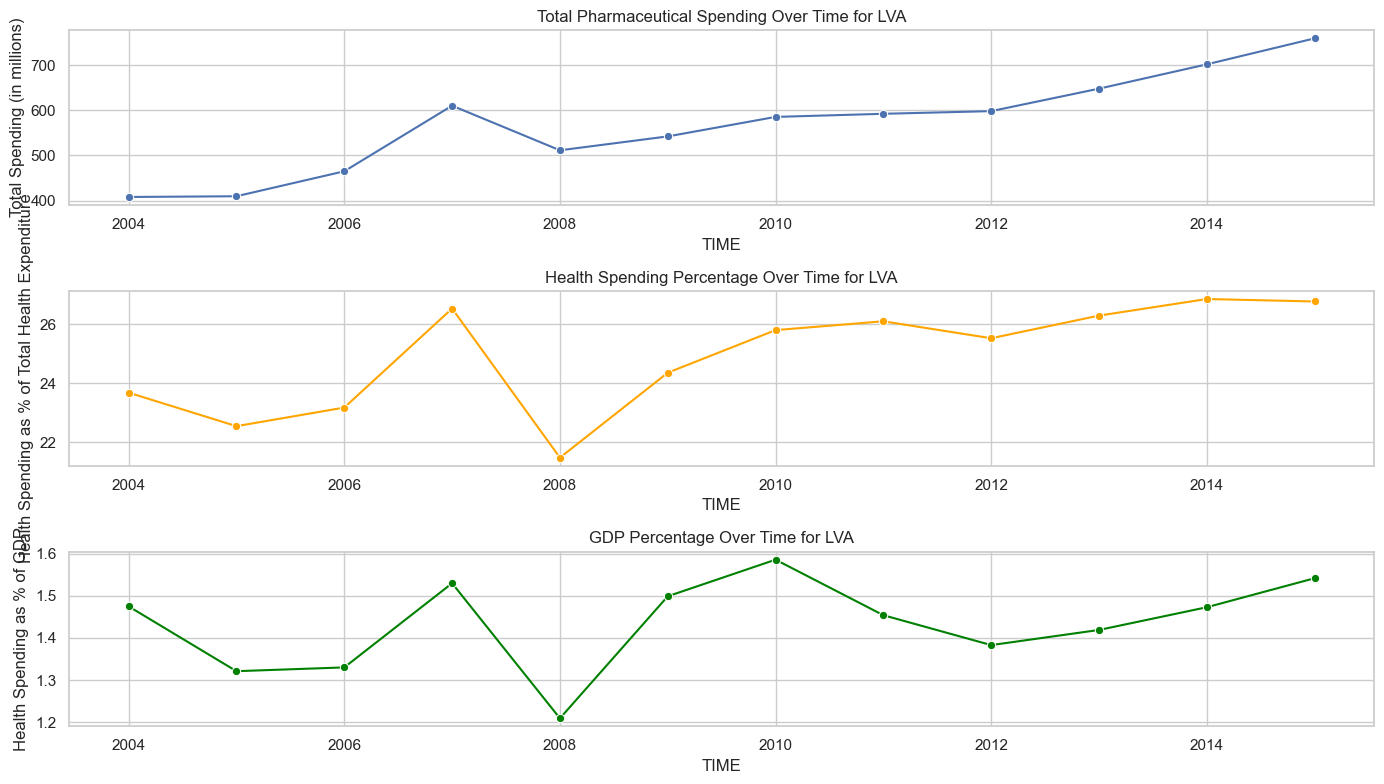

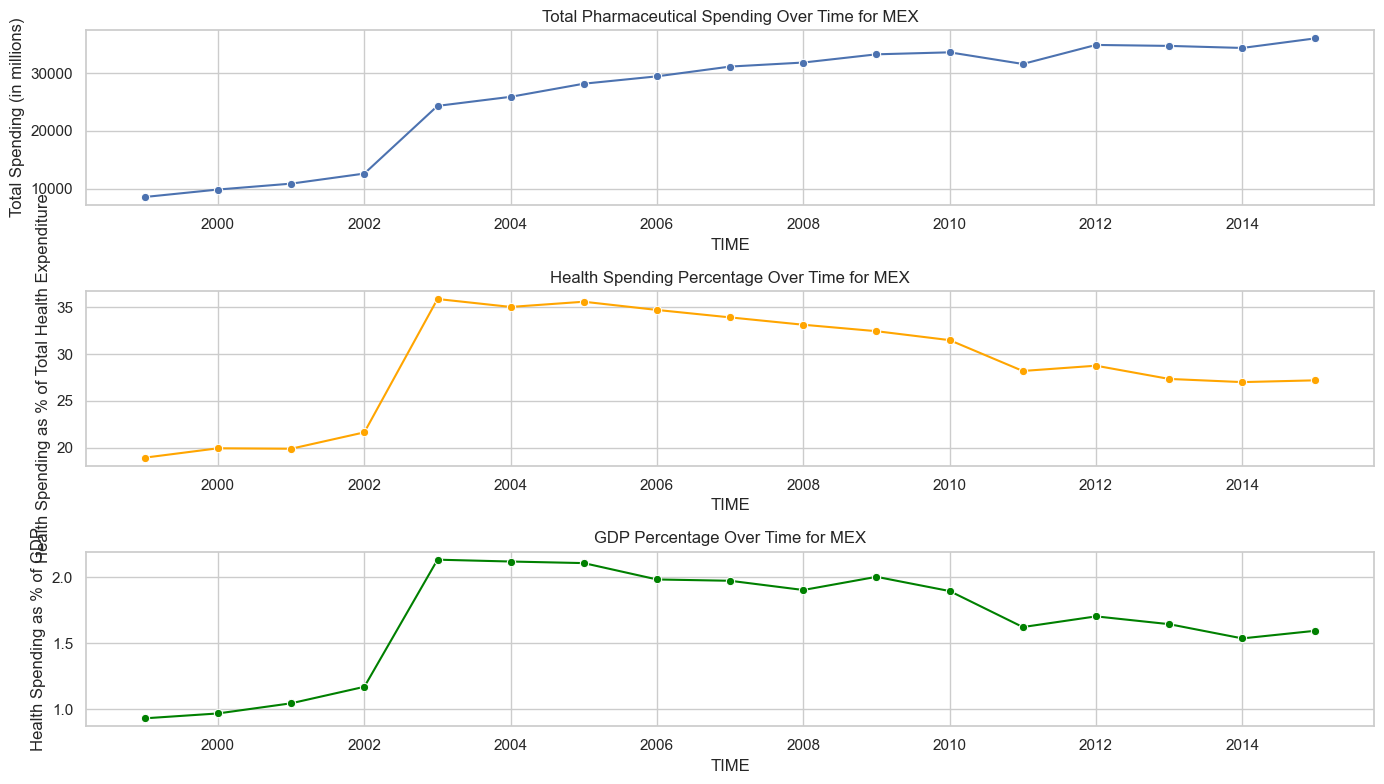

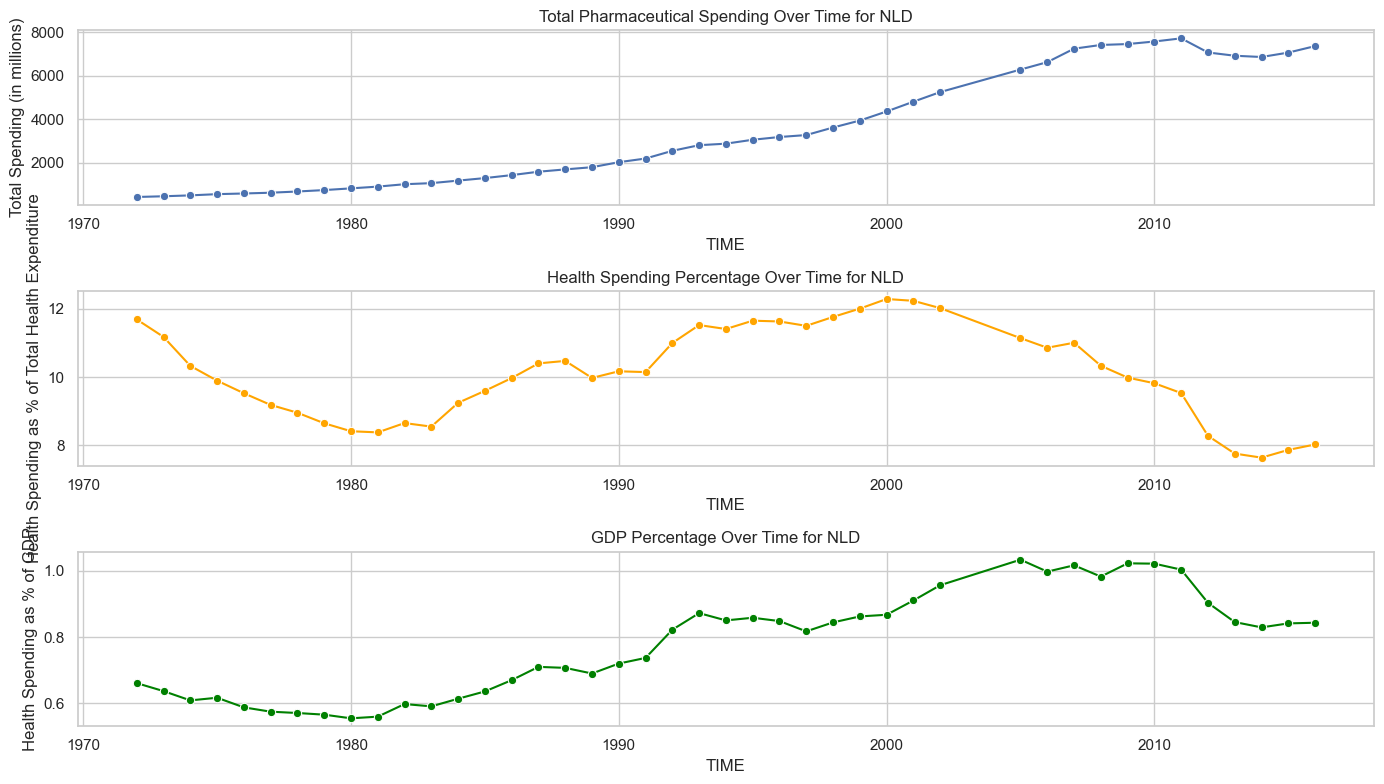

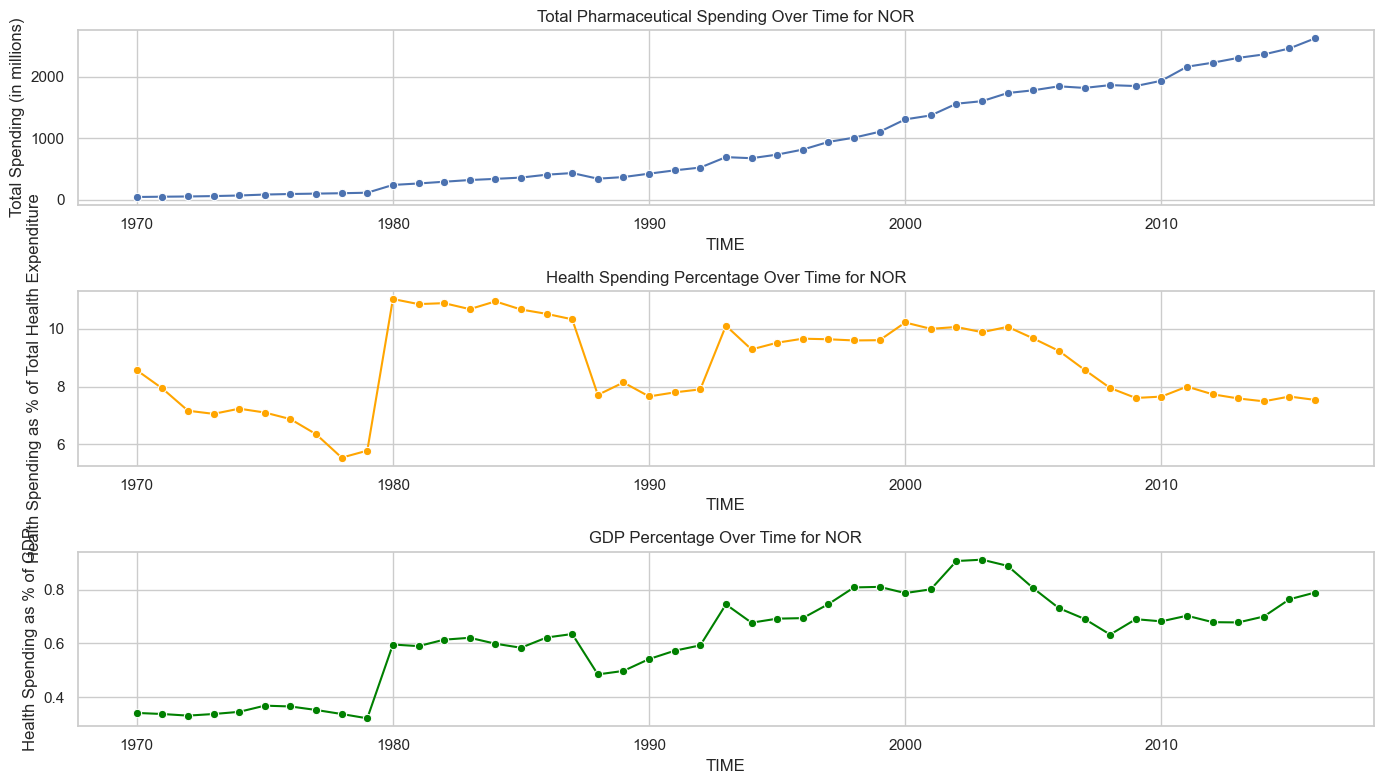

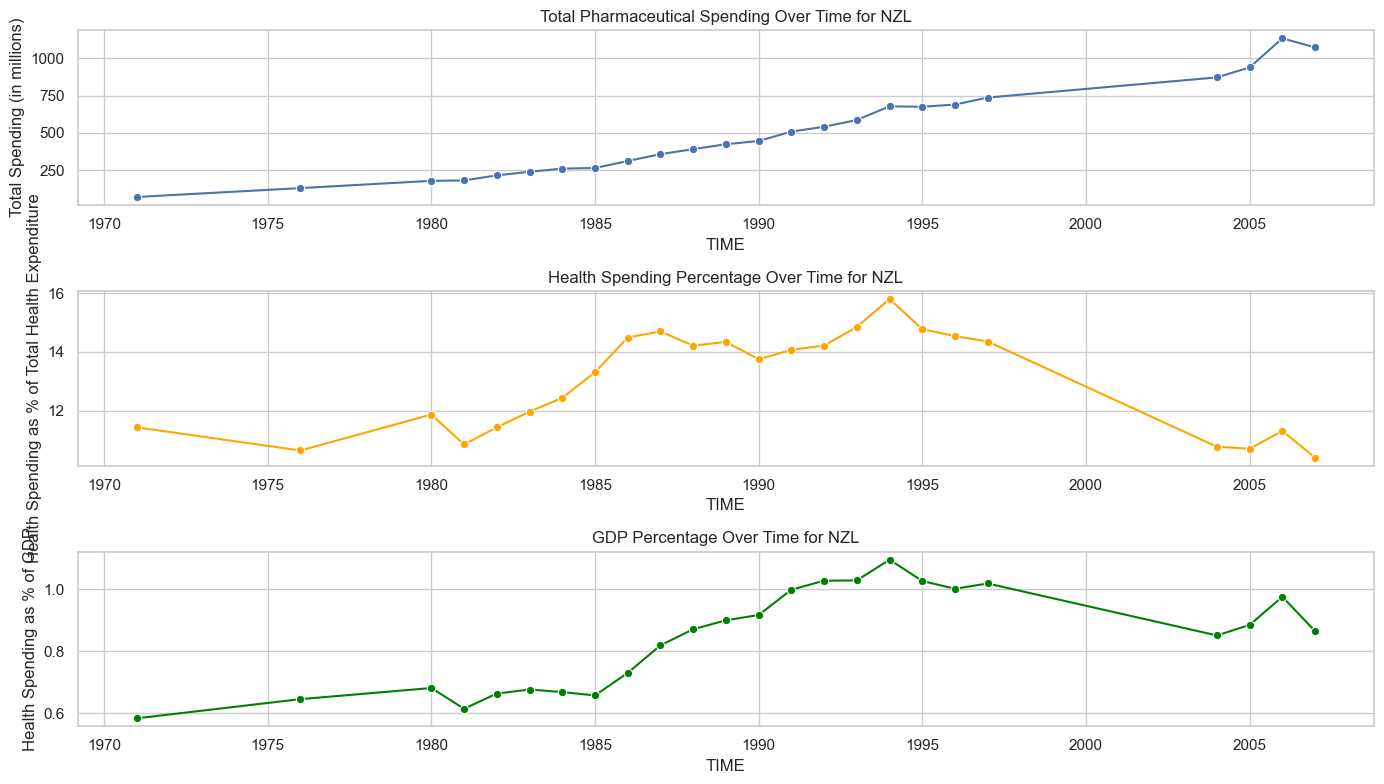

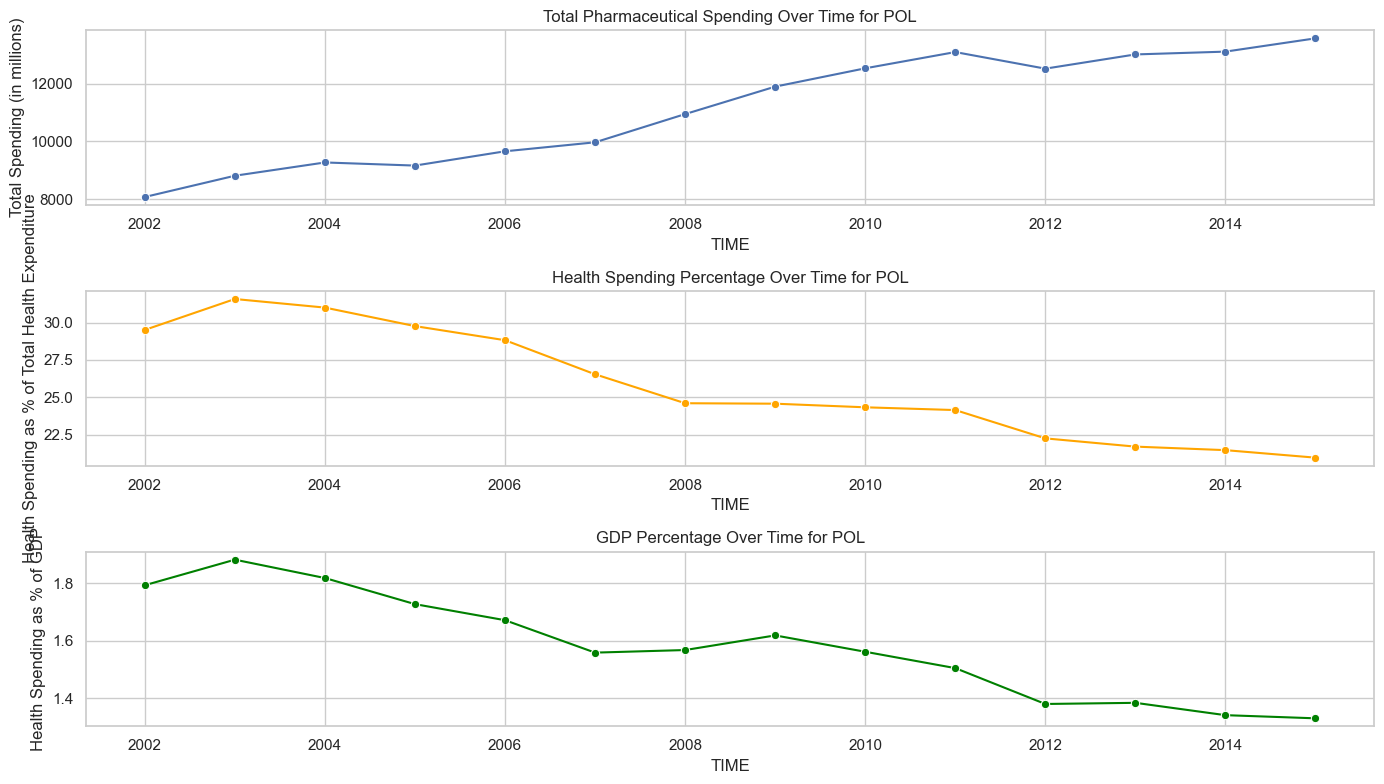

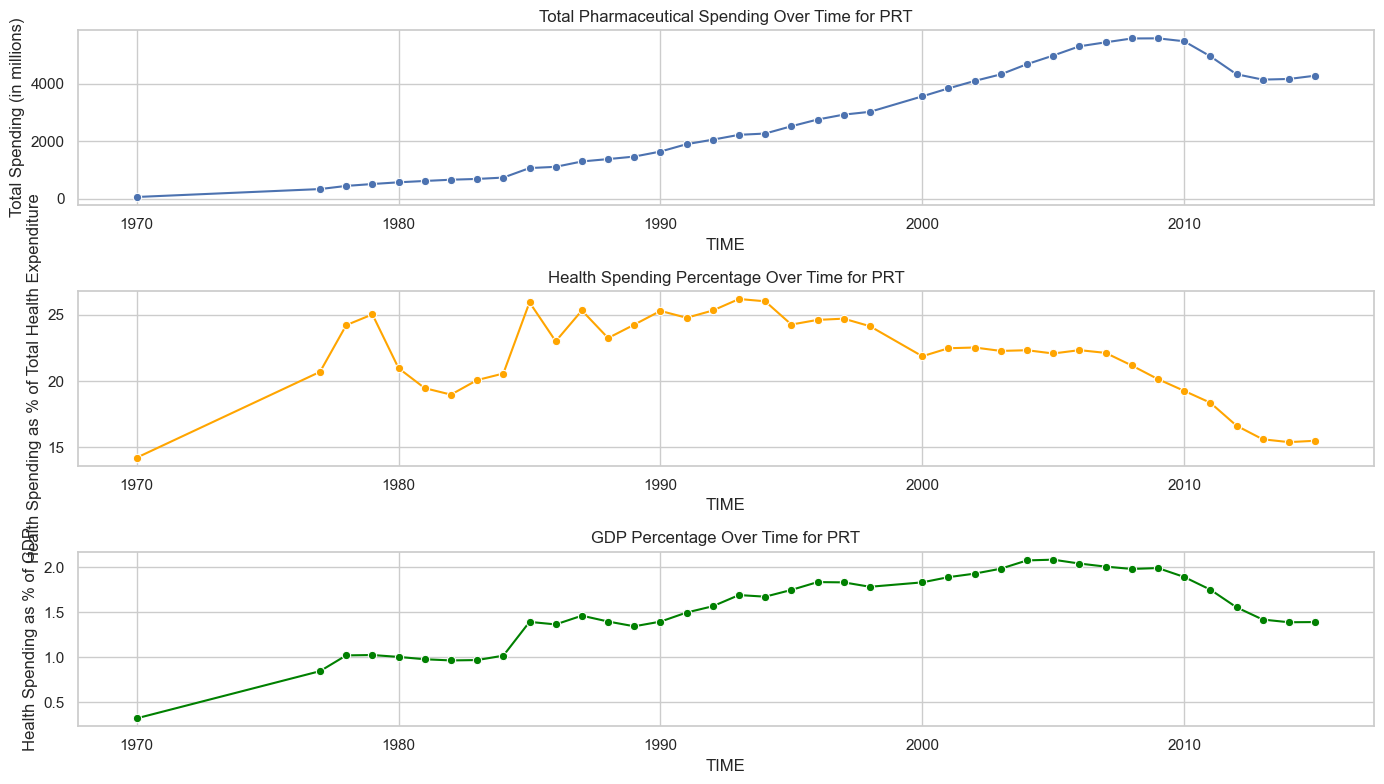

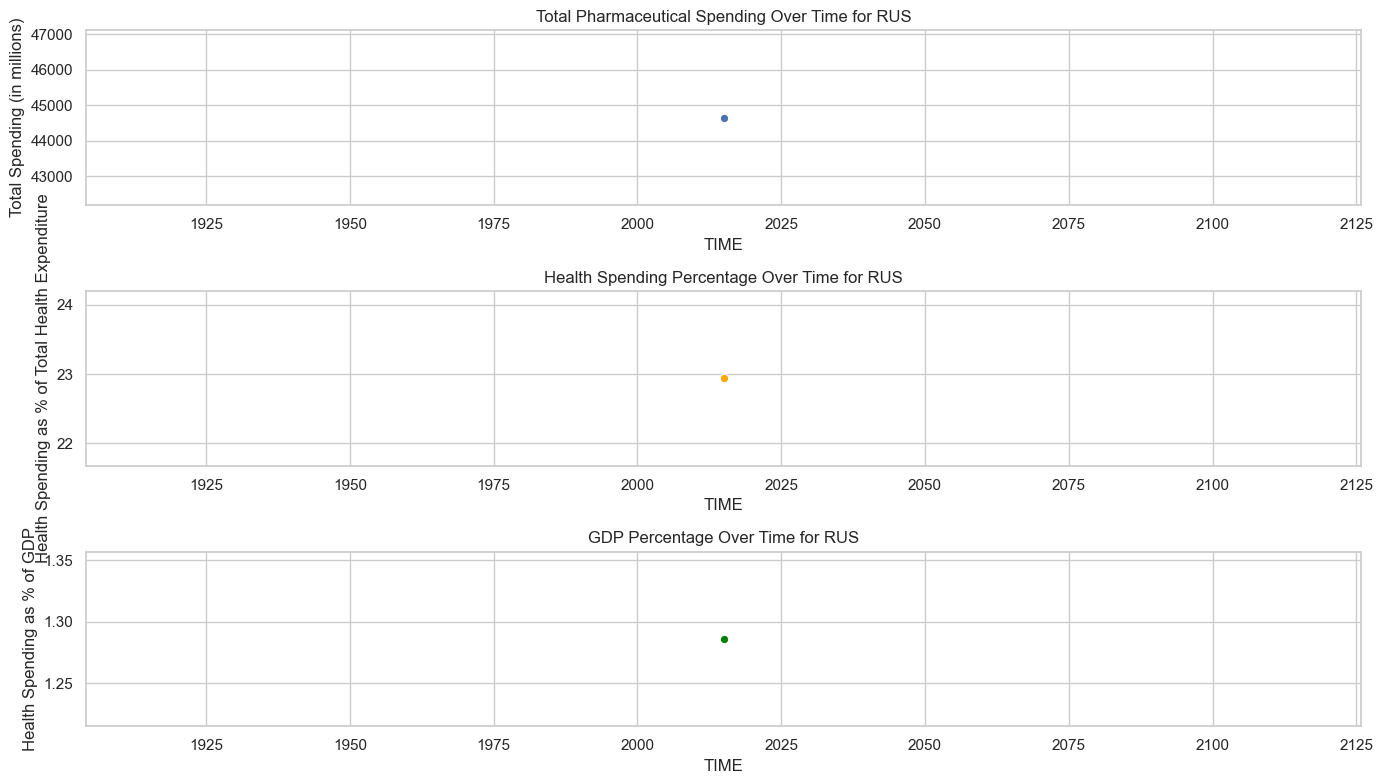

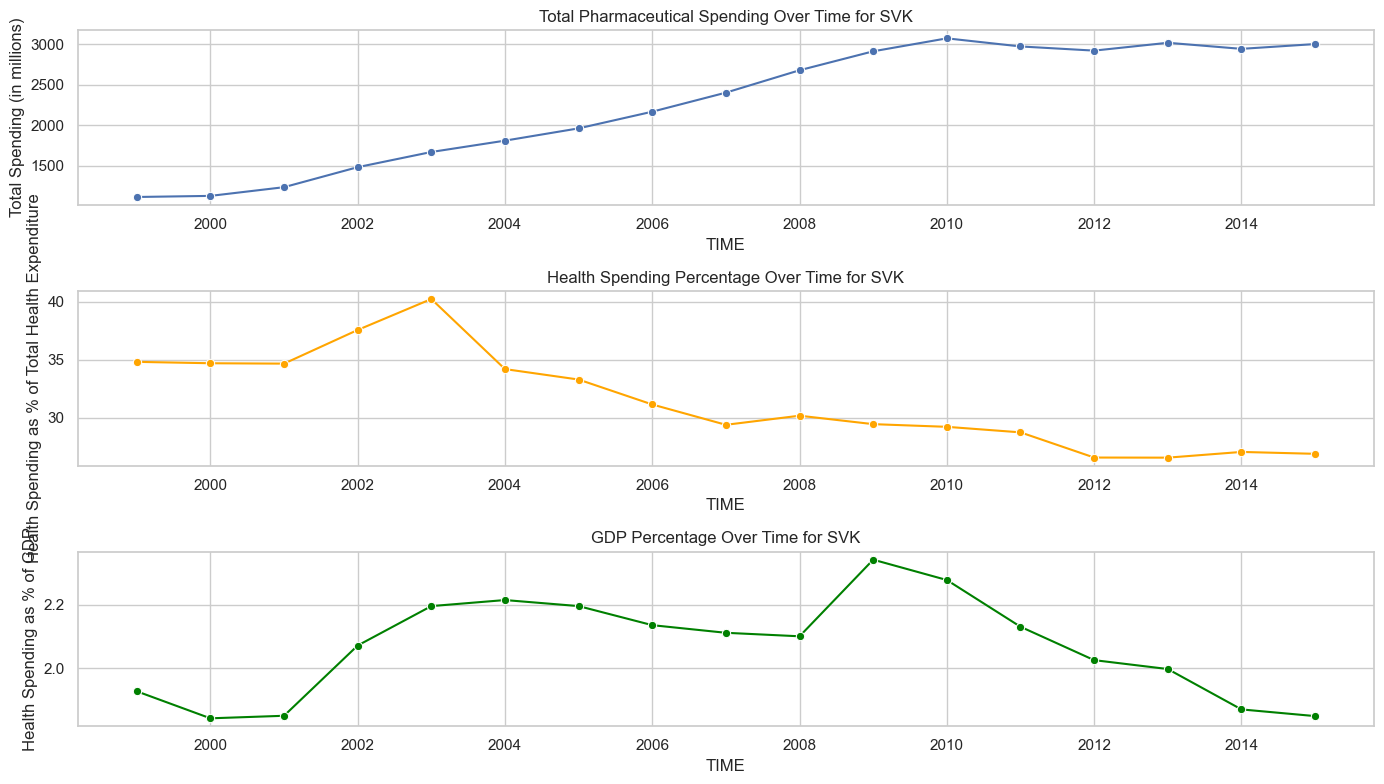

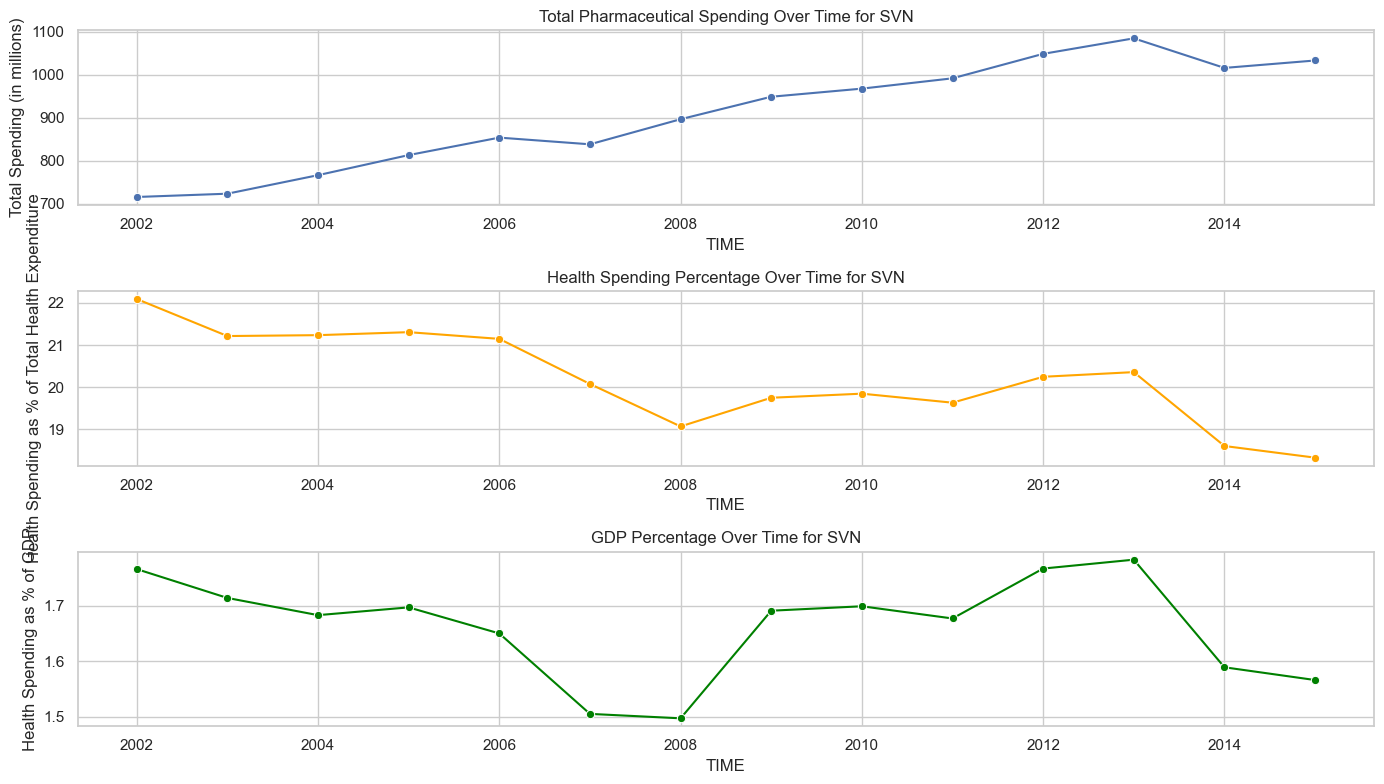

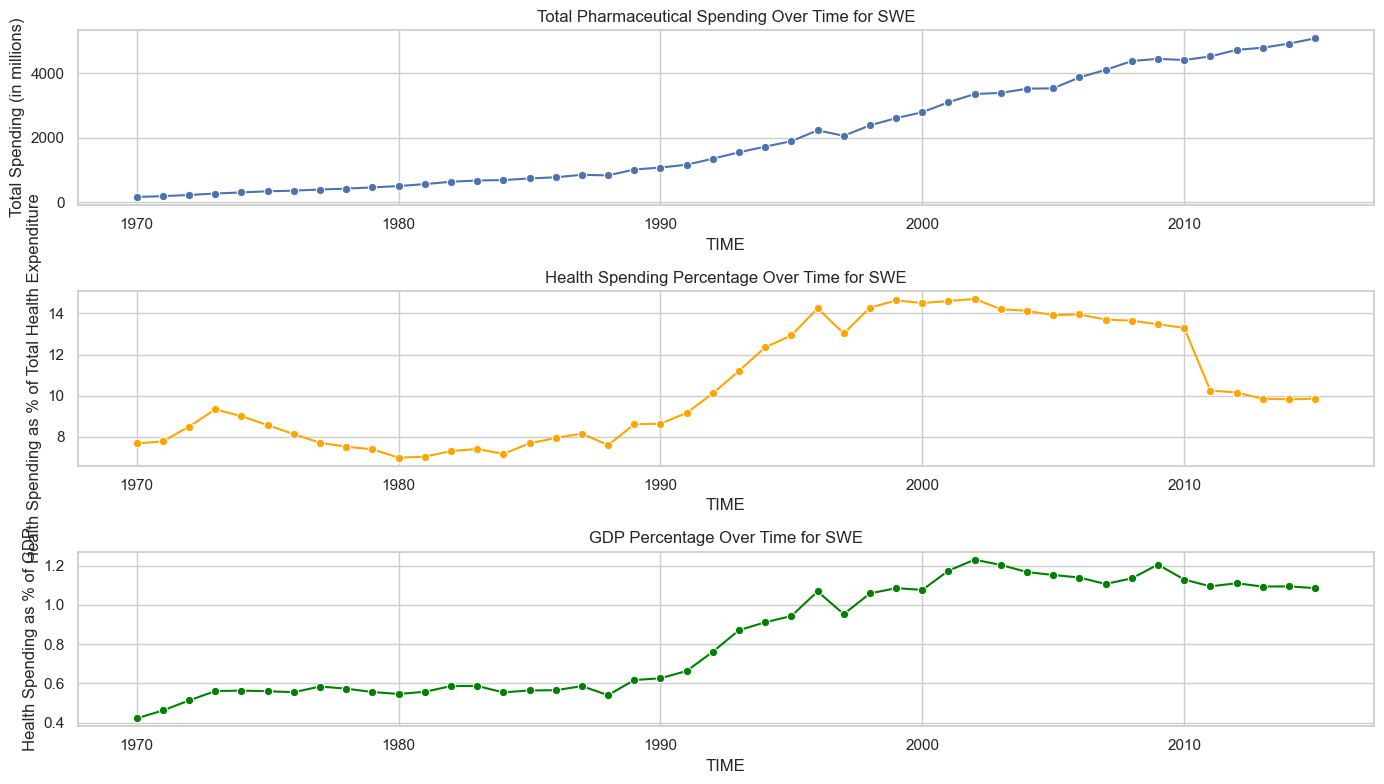

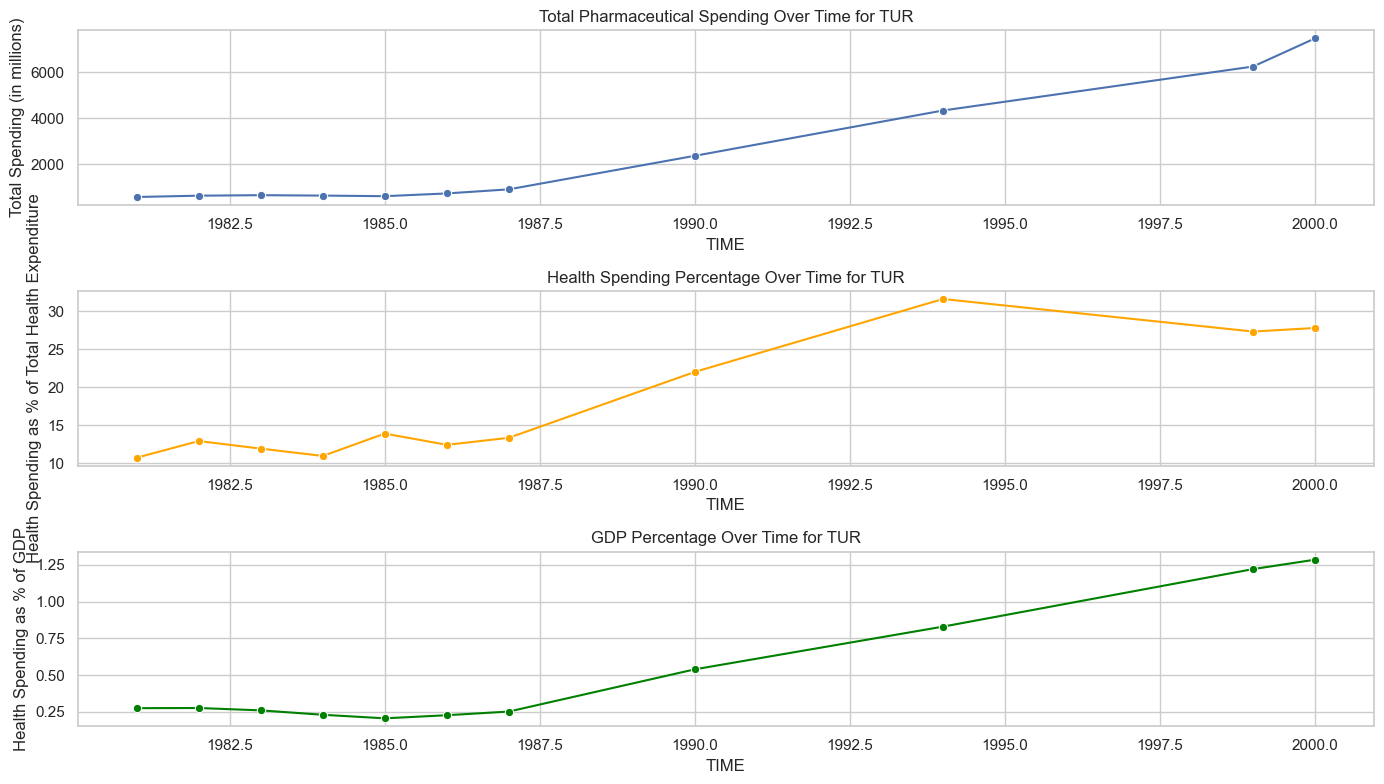

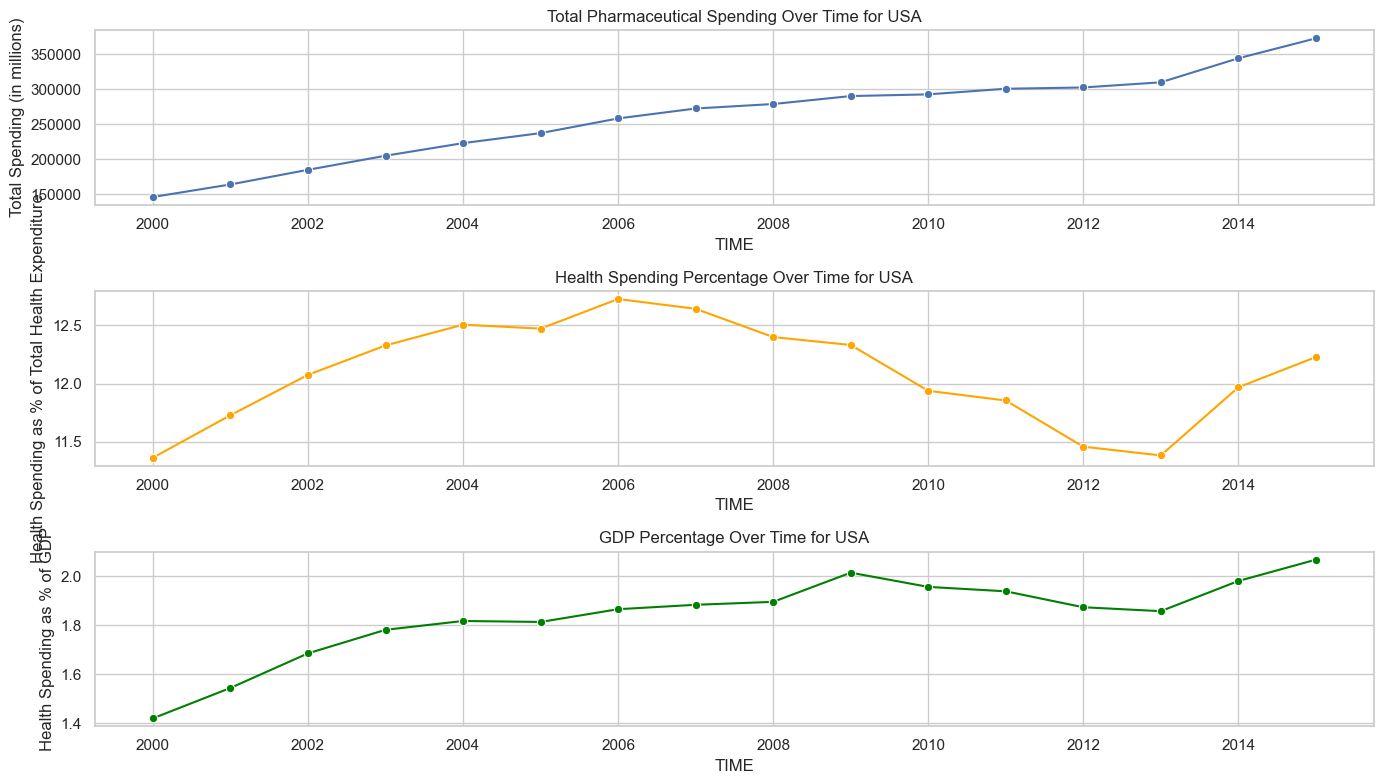

In [8]:
#Checking trends 

data['TIME'] = data['TIME'].astype(int)

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Unique countries
countries = data['LOCATION'].unique()

for country in countries:
    country_data = data[data['LOCATION'] == country]
    
    plt.figure(figsize=(14, 8))
    
    # Plot Total Spending
    plt.subplot(3, 1, 1)
    sns.lineplot(data=country_data, x='TIME', y='TOTAL_SPEND', marker='o')
    plt.title(f'Total Pharmaceutical Spending Over Time for {country}')
    plt.ylabel('Total Spending (in millions)')
    
    # Plot Health Expenditure Percentage
    plt.subplot(3, 1, 2)
    sns.lineplot(data=country_data, x='TIME', y='PC_HEALTHXP', marker='o', color='orange')
    plt.title(f'Health Spending Percentage Over Time for {country}')
    plt.ylabel('Health Spending as % of Total Health Expenditure')
    
    # Plot GDP Percentage
    plt.subplot(3, 1, 3)
    sns.lineplot(data=country_data, x='TIME', y='PC_GDP', marker='o', color='green')
    plt.title(f'GDP Percentage Over Time for {country}')
    plt.ylabel('Health Spending as % of GDP')
    
    plt.tight_layout()
    plt.show()


# Multiple linear regression

Hypothesis: Can we predict total pharmaceutical spending based on health spending percentage and GDP percentage?

In [11]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['PC_HEALTHXP', 'PC_GDP']]  # Independent variable
y = data['TOTAL_SPEND']               # Dependent variable

# intercept
X = sm.add_constant(X)


In [12]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            TOTAL_SPEND   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     132.8
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           9.72e-51
Time:                        22:01:53   Log-Likelihood:                -9769.5
No. Observations:                 828   AIC:                         1.955e+04
Df Residuals:                     825   BIC:                         1.956e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4025.7314   3263.398     -1.234      

Although the p values suggest this model is significant, 0 does not seem right. 
The R sq is also pretty low.
Requires further investigation
